<h1>Dự Đoán Giá Nhà Tại Đà Nẵng</h1>

<h4>Các trường trong raw_data</h4>

- Address: Địa chỉ nhà
- Prices: Giá nhà (tỷ)
- Area: Diện tích (m2)
- toFace: Hướng của ngôi nhà
- type: Loại nhà (mặt tiền/trong kiệt)
- certificate: Giấy tờ nhà (sổ đỏ/không có)
- width: Chiều rộng ngôi nhà (m)
- length: Chiều dài ngôi nhà (m)
- floors: Số tầng của ngôi nhà

Khai báo các thư viện sử dụng

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('../Data/raw_BigDS.csv')

In [3]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...","4,1 tỷ",60 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"4,5m",15m,5
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...","3,3 tỷ",90 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,2
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15 tỷ,153 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6m,27m,3
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...","6,5 tỷ",90 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,14m,7m,1
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11 tỷ,100 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,20m,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      13859 non-null  object
 1   Prices       13859 non-null  object
 2   Area         13859 non-null  object
 3   toFace       13859 non-null  object
 4   type         13859 non-null  object
 5   certificate  13859 non-null  object
 6   width        13859 non-null  object
 7   length       13859 non-null  object
 8   floors       13859 non-null  object
dtypes: object(9)
memory usage: 974.6+ KB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [5]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

In [6]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...",4.1,60 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"4,5m",15m,5
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...",3.3,90 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,2
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15.0,153 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6m,27m,3
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...",6.5,90 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,14m,7m,1
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11.0,100 m2,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,20m,5


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [7]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

Những giá trị area nào bằng 0 thì chuyển về NaN

In [8]:
df.loc[df.Area==0,'Area']=np.nan

In [9]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...",4.1,60.0,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"4,5m",15m,5
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...",3.3,90.0,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,2
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15.0,153.0,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6m,27m,3
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...",6.5,90.0,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,14m,7m,1
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11.0,100.0,_,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,20m,5


### toFace

In [10]:
df['toFace'].unique()

array(['_', 'Tây', 'Đông', 'Tây Bắc', 'Đông Bắc', 'Đông Nam', 'Tây Nam',
       'Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [11]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [12]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...",4.1,60.0,Không,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"4,5m",15m,5
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...",3.3,90.0,Không,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,2
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15.0,153.0,Không,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6m,27m,3
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...",6.5,90.0,Không,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,14m,7m,1
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11.0,100.0,Không,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,20m,5


### Type

In [13]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [14]:
df['certificate'].unique()

array(['Sổ hồng/ Sổ đỏ', '---', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [15]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [16]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...",4.1,60.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,"4,5m",15m,5
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...",3.3,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,2
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15.0,153.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,6m,27m,3
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...",6.5,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,14m,7m,1
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11.0,100.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5m,20m,5


### Width and Length

Loại bỏ các từ thừa

In [17]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [18]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [19]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [20]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [21]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...",4.1,60.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,4.5,15.0,5
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...",3.3,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,2
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15.0,153.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,6.0,27.0,3
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...",6.5,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,14.0,7.0,1
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11.0,100.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,20.0,5


### Floors

Các giá trị của biến floors

In [22]:
df['floors'].unique()

array(['5', '2', '3', '1', '4', '---', '14', '6', '10', '7', '8', '11',
       '9', '19', '33', '34', '18', '123', '23', '15', '35', '25', '12',
       '17', '20', '28'], dtype=object)

Chuyển những giá trị '---' thành NaN

In [23]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

### Định dạng lại dữ liệu

In [24]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường An Thượng 18, Phường Mỹ An, Quận Ngũ Hà...",4.1,60.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,4.5,15.0,5.0
1,"Đường Trường Chinh, Phường Hòa An, Quận Cẩm L...",3.3,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,2.0
2,"Đường Ngô Quyền, Phường An Hải Bắc, Quận Sơn ...",15.0,153.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,6.0,27.0,3.0
3,"Đường Tiên Sơn 10, Phường Hòa Cường Nam, Quận...",6.5,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,14.0,7.0,1.0
4,"Đường Hoàng Đức Lương, Phường An Hải Bắc, Quậ...",11.0,100.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,20.0,5.0


In [25]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Sau khi định dạng 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      13859 non-null  object  
 1   Prices       13799 non-null  float64 
 2   Area         13725 non-null  float64 
 3   toFace       13859 non-null  category
 4   type         13859 non-null  category
 5   certificate  13859 non-null  category
 6   width        11977 non-null  float64 
 7   length       10127 non-null  float64 
 8   floors       13538 non-null  Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 704.5+ KB


In [27]:
df.describe()

,Prices,Area,width,length,floors
count,13799.000000,13725.000000,11977.000000,10127.000000,13538.0
mean,8.436170,87.241510,5.699954,18.226521,2.750776
std,11.489252,64.083621,5.227544,28.085243,2.027497
min,1.000000,0.103000,2.000000,1.000000,1.0
25%,3.600000,60.000000,4.500000,14.000000,2.0
50%,5.250000,80.000000,5.000000,17.700000,3.0
75%,8.900000,100.000000,5.500000,20.000000,3.0
max,315.000000,950.000000,420.000000,2020.000000,123.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [28]:
# df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)
df['Street']=df['Address'].str.split(', ', expand=True)[0]
df['Ward']=df['Address'].str.split(', ', expand=True)[1]
df['District']=df['Address'].str.split(', ', expand=True)[2]

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [29]:
df = df.drop(['Address'], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường An Thượng 18,Phường Mỹ An,Quận Ngũ Hành Sơn,4.1,60.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,4.5,15.0,5
1,Đường Trường Chinh,Phường Hòa An,Quận Cẩm Lệ,3.3,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,2
2,Đường Ngô Quyền,Phường An Hải Bắc,Quận Sơn Trà,15.0,153.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,6.0,27.0,3
3,Đường Tiên Sơn 10,Phường Hòa Cường Nam,Quận Hải Châu,6.5,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,14.0,7.0,1
4,Đường Hoàng Đức Lương,Phường An Hải Bắc,Quận Sơn Trà,11.0,100.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,20.0,5


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [30]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [31]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [32]:
df['District'].unique()

array(['ngũ hành sơn', 'cẩm lệ', 'sơn trà', 'hải châu', 'hòa vang',
       'liên chiểu', 'thanh khê'], dtype=object)

Thêm một trường Location theo Address của ngôi nhà

Sử dụng API của BingMap để lấy latitude, Longitude theo địa chỉ của ngôi nhà

In [33]:
import requests

# Địa chỉ cần tìm tọa độ
address = "Đường Huyền Trân Công Chúa, Ngũ Hành Sơn, Đà Nẵng, Việt Nam"

# Tạo URL request
url = "https://dev.virtualearth.net/REST/v1/Locations"

# Gửi yêu cầu HTTP
def getLocation(Address):
    params = {
        "q": Address,
        "key": "AuCD3WhuOOT5HhbRcvJAt1DyK293gMNSAfPSTcgaXGlrVlVTRpXs06BWdTexjaOA"
    }
    response = requests.get(url, params=params)
    data = response.json()
    # Kiểm tra xem có kết quả tọa độ hay không
    if "resourceSets" in data and len(data["resourceSets"]) > 0 and "resources" in data["resourceSets"][0] and len(data["resourceSets"][0]["resources"]) > 0:
        coordinates = data["resourceSets"][0]["resources"][0]["point"]["coordinates"]
        latitude = coordinates[0]
        longitude = coordinates[1]
        location = str(latitude)+","+str(longitude)
        return location
    else:
        return np.nan


In [34]:
# Address = df['Street']+', '+df['District']+', Đà Nẵng, Việt Nam'
# df['Location']=Address.apply(lambda x: getLocation(x))
# df.to_csv('clean_data.csv')

In [35]:
df = pd.read_csv('../Data/clean_BigDS.csv')

In [36]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location
0,An Thượng 18,Mỹ An,ngũ hành sơn,4.1,60.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,4.5,15.0,5.0,"16.04836,108.24055"
1,Trường Chinh,Hòa An,cẩm lệ,3.3,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,2.0,"16.00735,108.19196"
2,Ngô Quyền,An Hải Bắc,sơn trà,15.0,153.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,6.0,27.0,3.0,"16.09631,108.24529"
3,Tiên Sơn 10,Hòa Cường Nam,hải châu,6.5,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,14.0,7.0,1.0,"16.03438,108.22172"
4,Hoàng Đức Lương,An Hải Bắc,sơn trà,11.0,100.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,20.0,5.0,"16.07525,108.23292"


Tạo thêm 2 trường 
- DistanceToCenter (Khoảng cách đến trung tâm thành phố)
- DistanceToBeach (Khoảng cách đến biển)

In [37]:
tttp = (16.061203,108.226744)
beach = (16.0704,108.2461)
airport = (16.043889 ,108.199444)
def distance(l1,l2):
    # return (np.sqrt((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)*1000)
    lat1_rad = np.radians(l1[0])
    lon1_rad = np.radians(l1[1])
    lat2_rad = np.radians(l2[0])
    lon2_rad = np.radians(l2[1])

    # Tính khoảng cách
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Bán kính trái đất (đơn vị: kilômét)
    distance = radius * c
    return distance

df['Latitude'] = (df['Location'].str.split(',',expand=True)[0])
df['Longitude'] = df['Location'].str.split(',',expand=True)[1]

In [38]:
df['Latitude']=df['Latitude'].astype('float32')
df['Longitude']=df['Longitude'].astype('float32')
df['DistanceToCenter'] = distance(tttp,(np.float64(df['Latitude']),np.float64(df['Longitude'])))
df['DistanceToBeach']= distance(beach,(np.float64(df['Latitude']),np.float64(df['Longitude'])))

In [39]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,An Thượng 18,Mỹ An,ngũ hành sơn,4.1,60.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,4.5,15.0,5.0,"16.04836,108.24055",16.048361,108.240547,2.052976,2.521452
1,Trường Chinh,Hòa An,cẩm lệ,3.3,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,2.0,"16.00735,108.19196",16.007351,108.191963,7.047915,9.089636
2,Ngô Quyền,An Hải Bắc,sơn trà,15.0,153.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,6.0,27.0,3.0,"16.09631,108.24529",16.096310,108.245293,4.377946,2.882314
3,Tiên Sơn 10,Hòa Cường Nam,hải châu,6.5,90.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,14.0,7.0,1.0,"16.03438,108.22172",16.034380,108.221718,3.030561,4.778120
4,Hoàng Đức Lương,An Hải Bắc,sơn trà,11.0,100.0,Không,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,20.0,5.0,"16.07525,108.23292",16.075251,108.232918,1.695609,1.508238


## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [40]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = sqrt(area)

In [41]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = np.sqrt(df['Area'])

## Outlier

In [42]:
data = df.copy()

In [43]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
lower_boundary=df['Prices'].mean() - 3* df['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 42.85597635908523


In [44]:
df.loc[(df.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

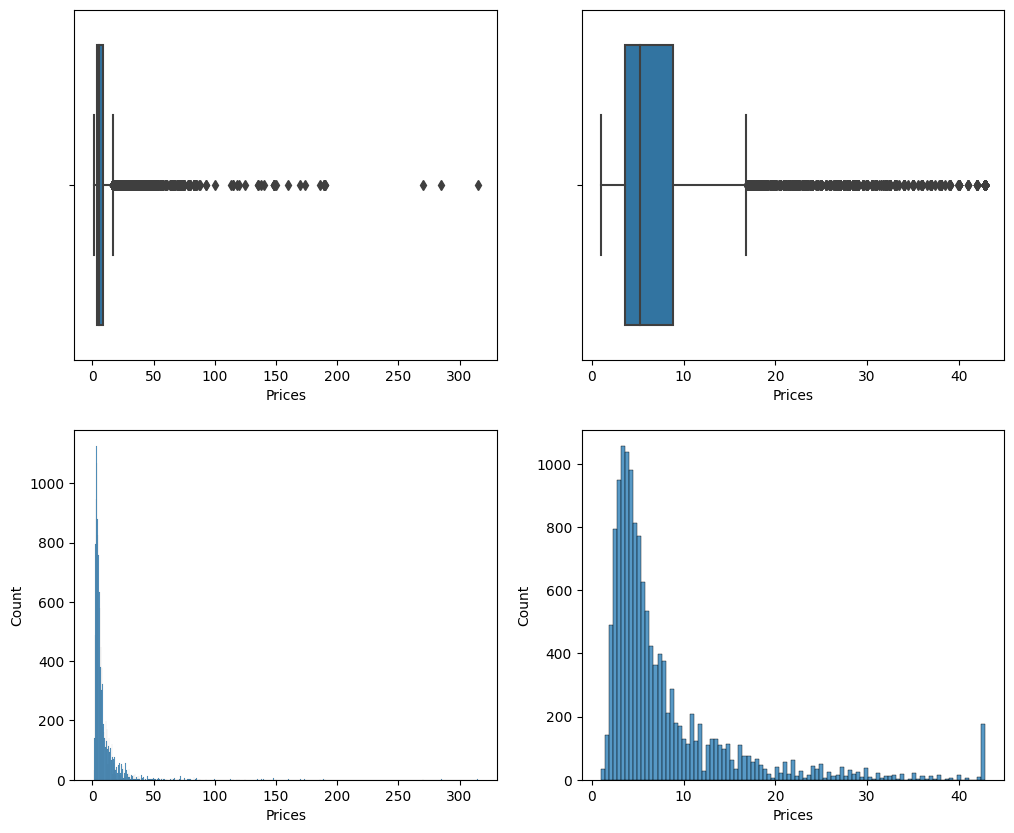

In [45]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices',ax=axes[1][1])

In [46]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 278.333006636894


In [47]:
df.loc[(df.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

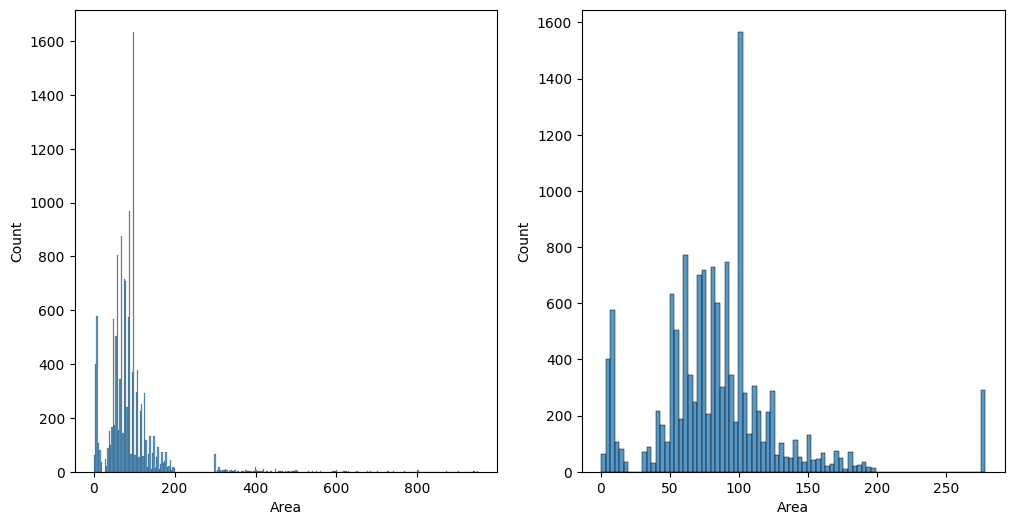

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df,x='Area',ax=axes[1])

In [49]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 8.776812457464619


In [50]:
df.loc[(df.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

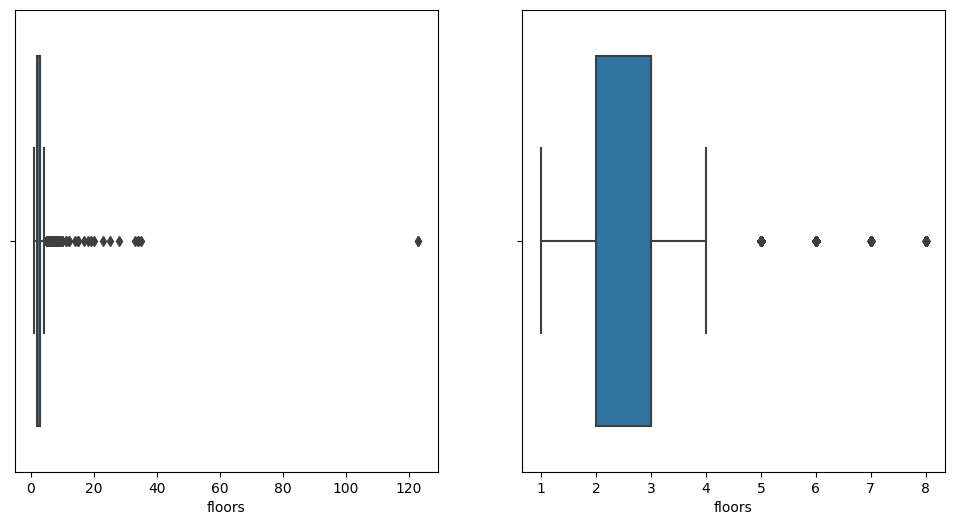

In [51]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df,x='floors',ax=axes[1])

In [52]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 21.54648771178057


<Axes: xlabel='width'>

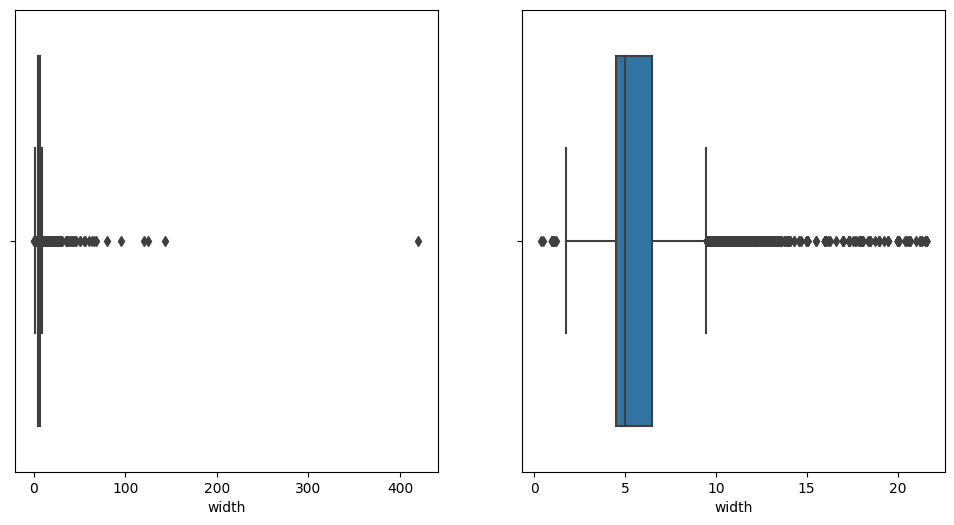

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df,x='width',ax=axes[1])

In [54]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 90.43509186910704


<Axes: xlabel='length'>

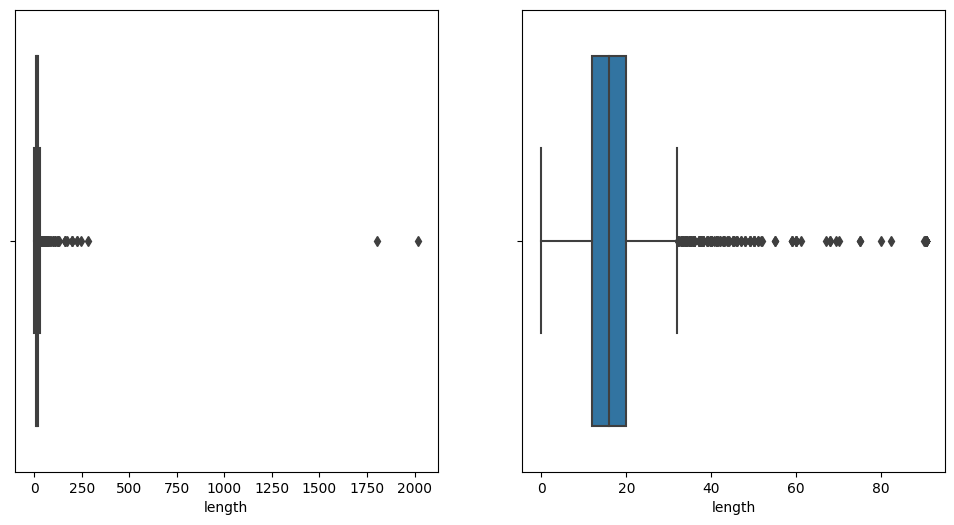

In [55]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df,x='length',ax=axes[1])

In [56]:
uppper_boundary=df['DistanceToCenter'].mean() + 3* df['DistanceToCenter'].std()
print("Biên trên:",20)
df.loc[(df.DistanceToCenter>20),'DistanceToCenter'] = 20

Biên trên: 20


<Axes: xlabel='DistanceToCenter'>

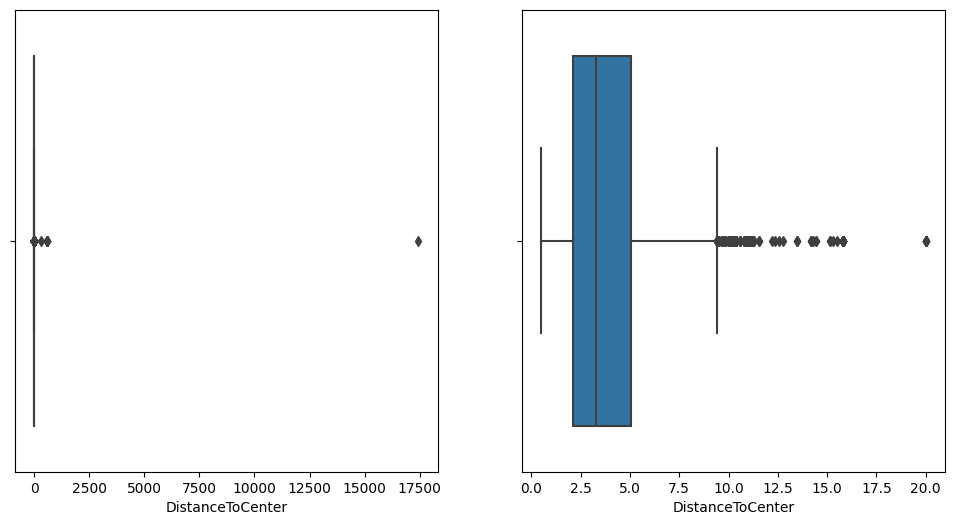

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='DistanceToCenter',ax=axes[0])
sns.boxplot(data=df,x='DistanceToCenter',ax=axes[1])

In [58]:
uppper_boundary=df['DistanceToBeach'].mean() + 3* df['DistanceToBeach'].std()
print("Biên trên:",17)
df.loc[(df.DistanceToBeach>17),'DistanceToBeach'] = 17

Biên trên: 17


<Axes: xlabel='DistanceToBeach'>

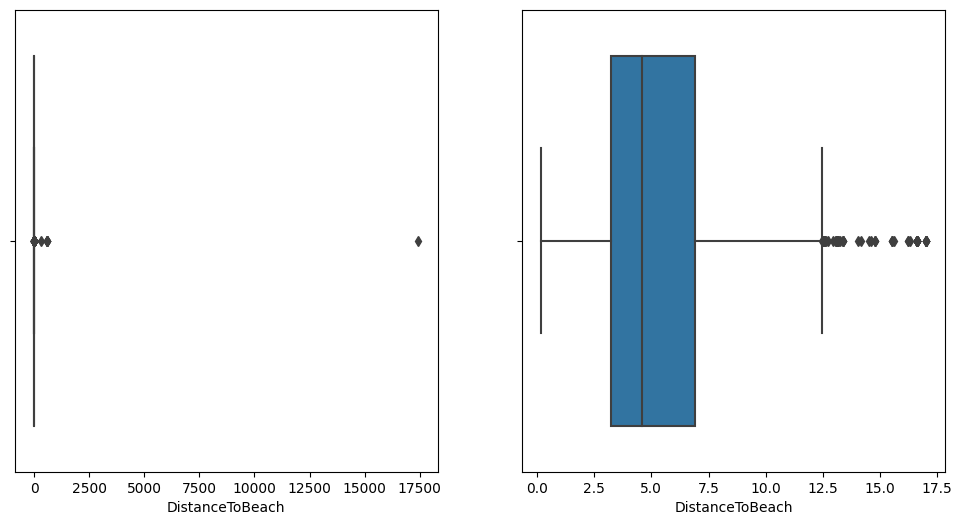

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='DistanceToBeach',ax=axes[0])
sns.boxplot(data=df,x='DistanceToBeach',ax=axes[1])

## Feature Selection (QKhang)

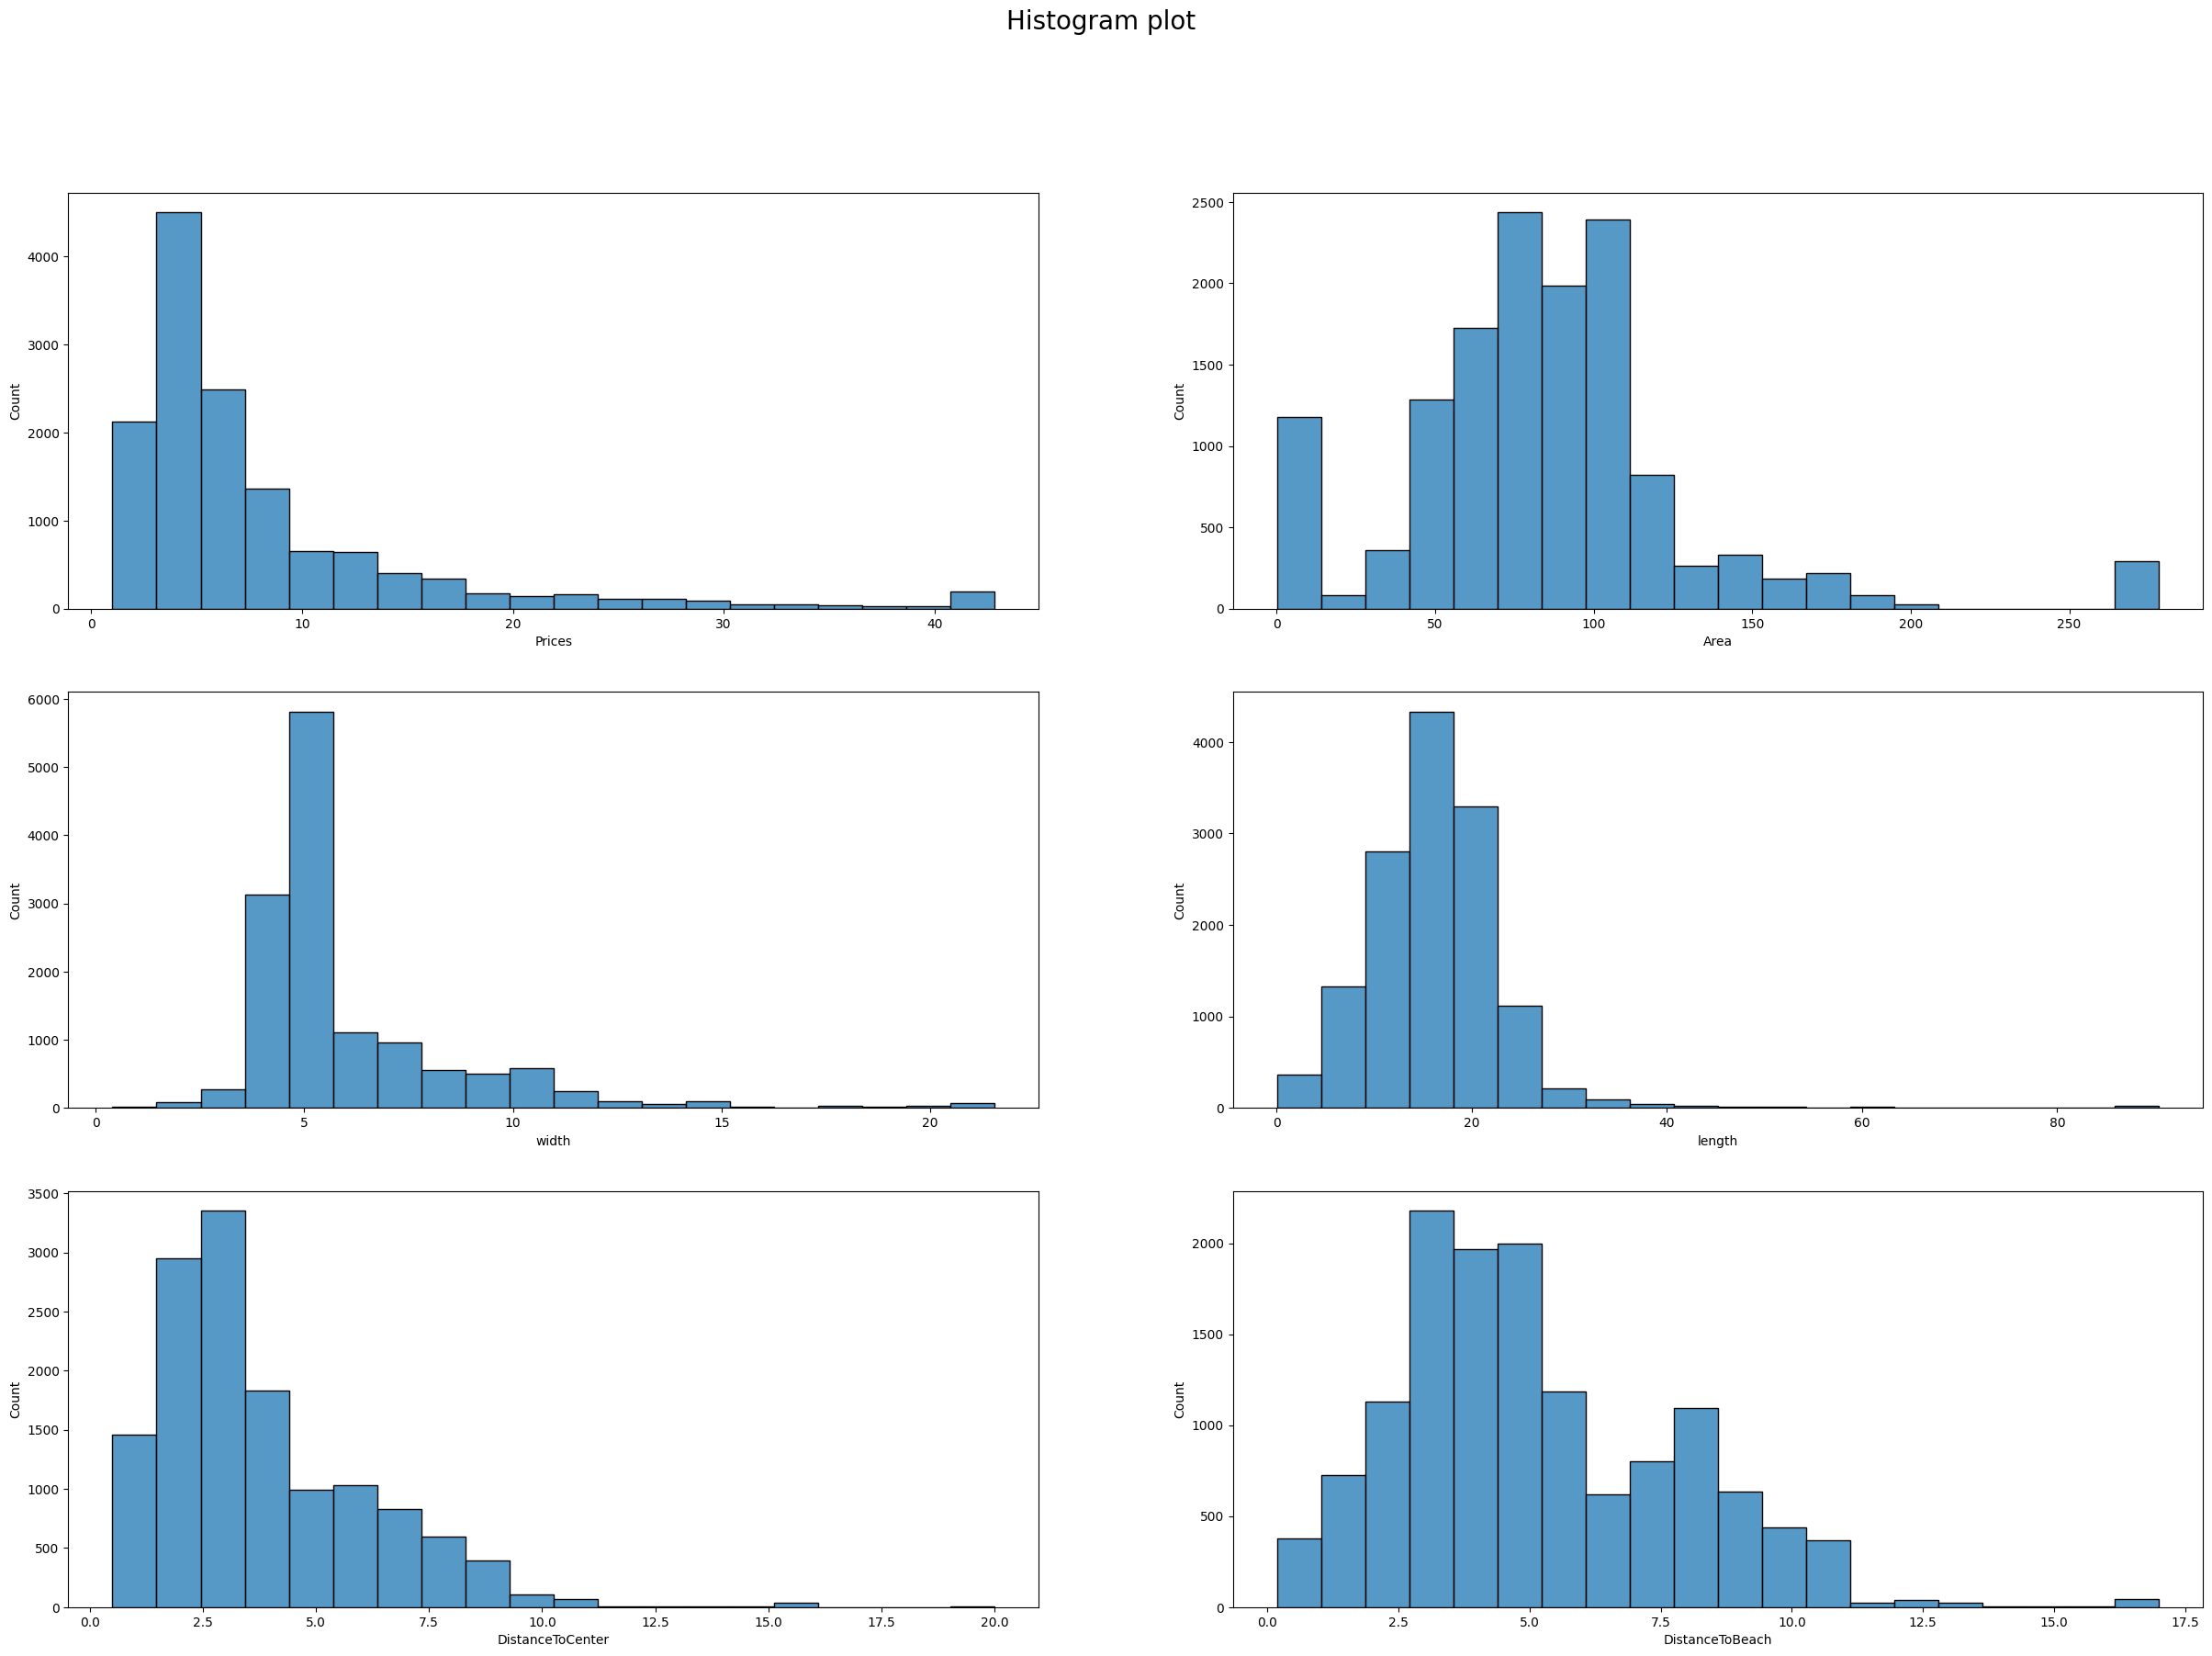

In [60]:
NummericData = ['Prices','Area','width','length','DistanceToCenter', 'DistanceToBeach']
fig = plt.figure(figsize = (30,20))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(3,2, i[0]+1)
    sns.histplot(x=df[i[1]], ax = axe, bins=20)

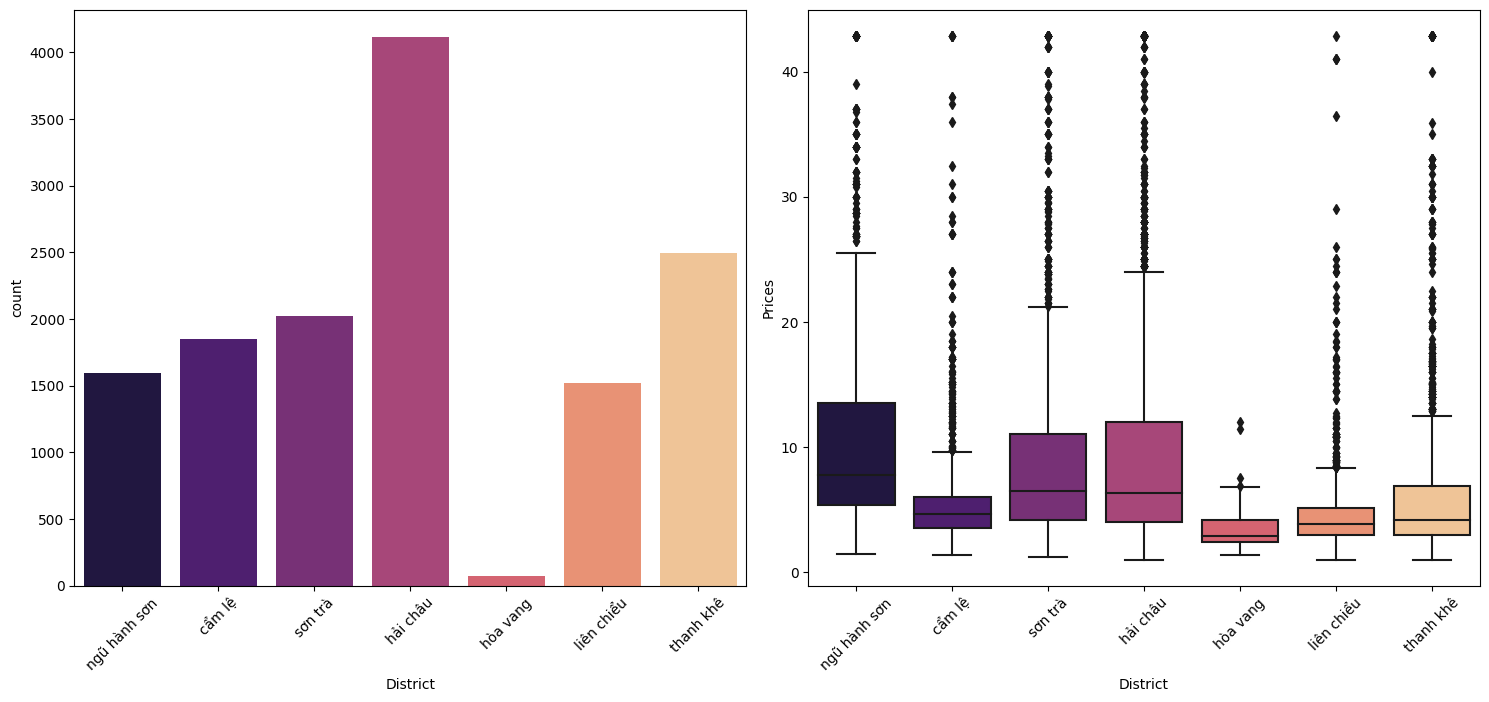

In [61]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("magma"))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.Prices, palette=("magma"))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

Nhận xét:
- Nhận thấy rằng Số lượng nhà ở quận Hải Châu là nhiều nhất

- Giá nhà ở quận Ngũ Hành Sơn là cao nhất

Vì vậy giá nhà và vị trí quận huyện tương quan với nhau

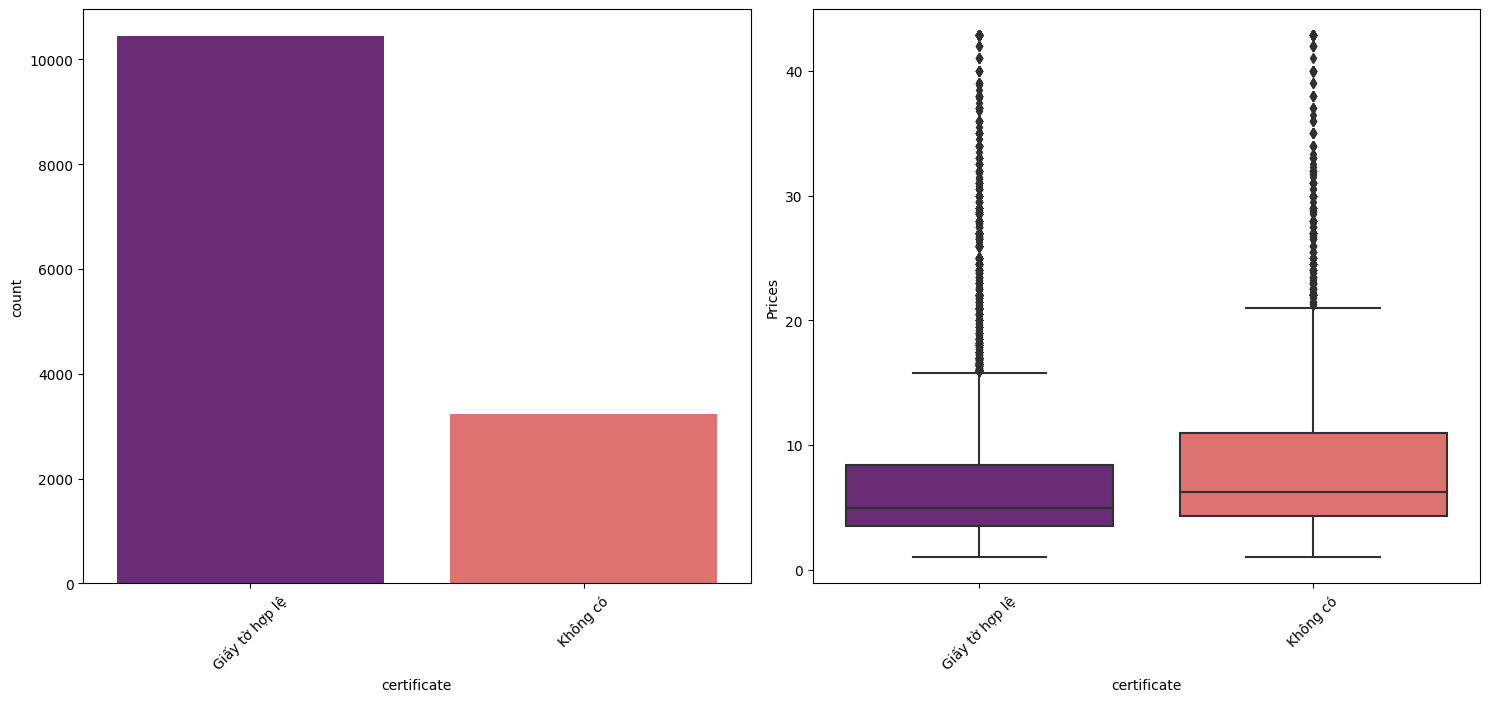

In [62]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

Nhận xét:
- Nhà có giấy tờ đầy đủ thì có giá bán cao hơn nhà không có giấy tờ

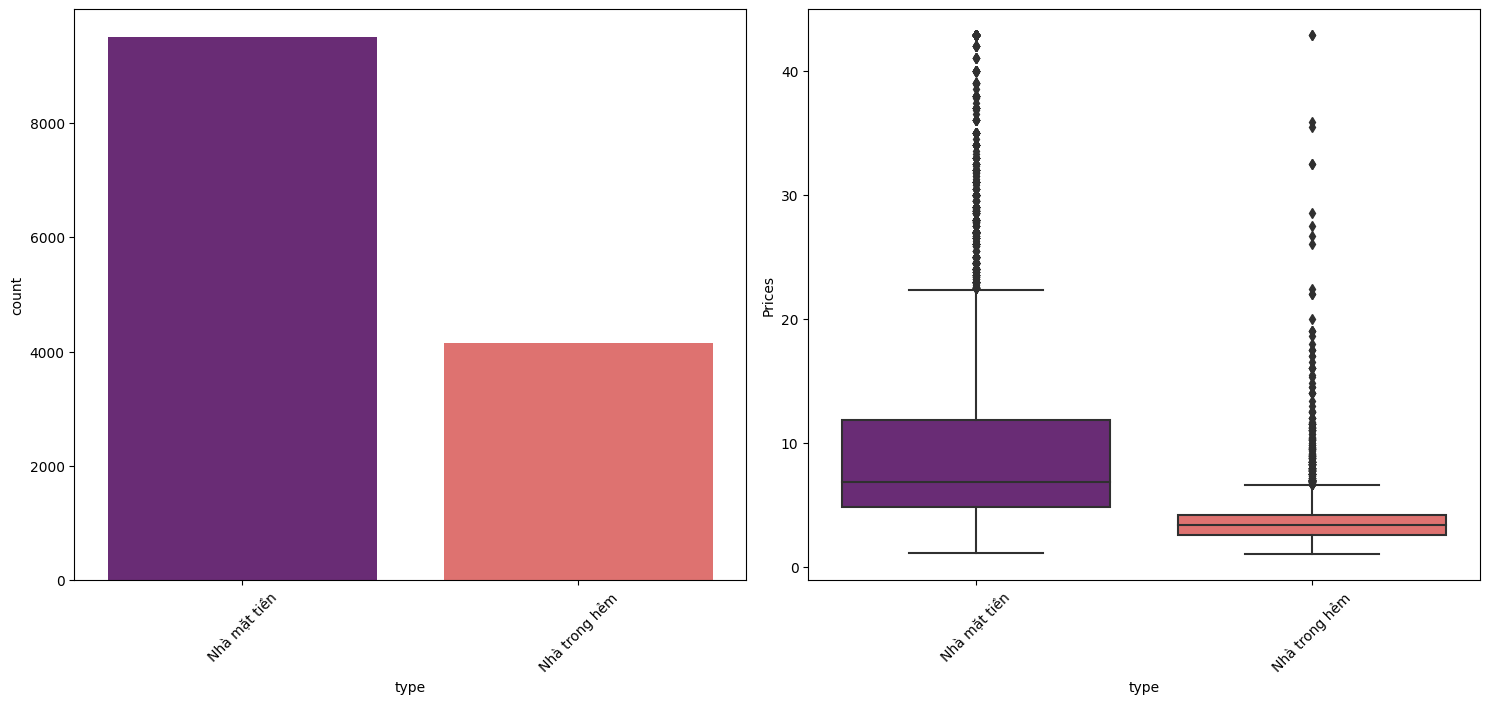

In [63]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

Nhận xét:

- Những nhà ở mặt tiền thì có giá cao bơn những nhà ở trong hẻm

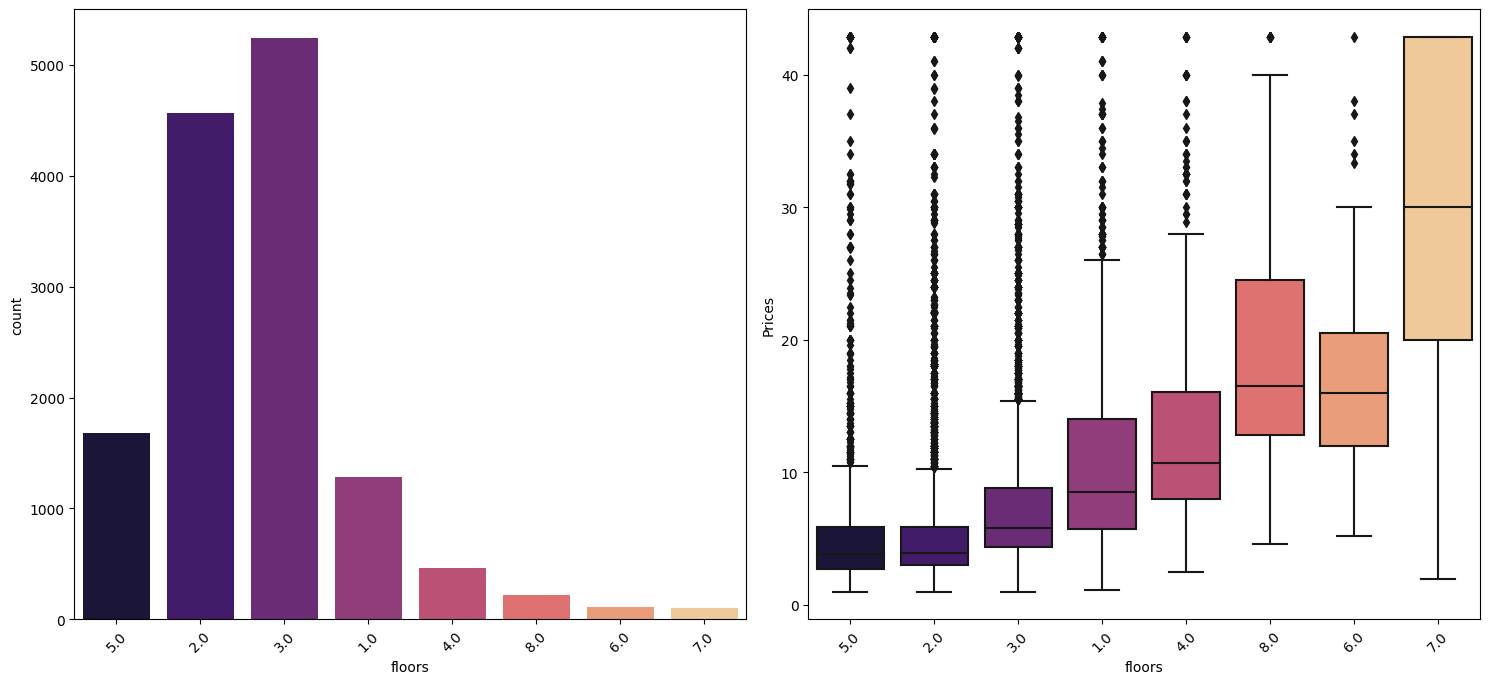

In [64]:
plt.figure(figsize=(15,20))
plot_count('floors', 1)
plt.tight_layout()

Nhận xét:
- Nhà 1 và 2 tầng được bán nhiều nhất
- Nhà cành nhiều tầng thì giá càng cao

floors tương quan với Prices

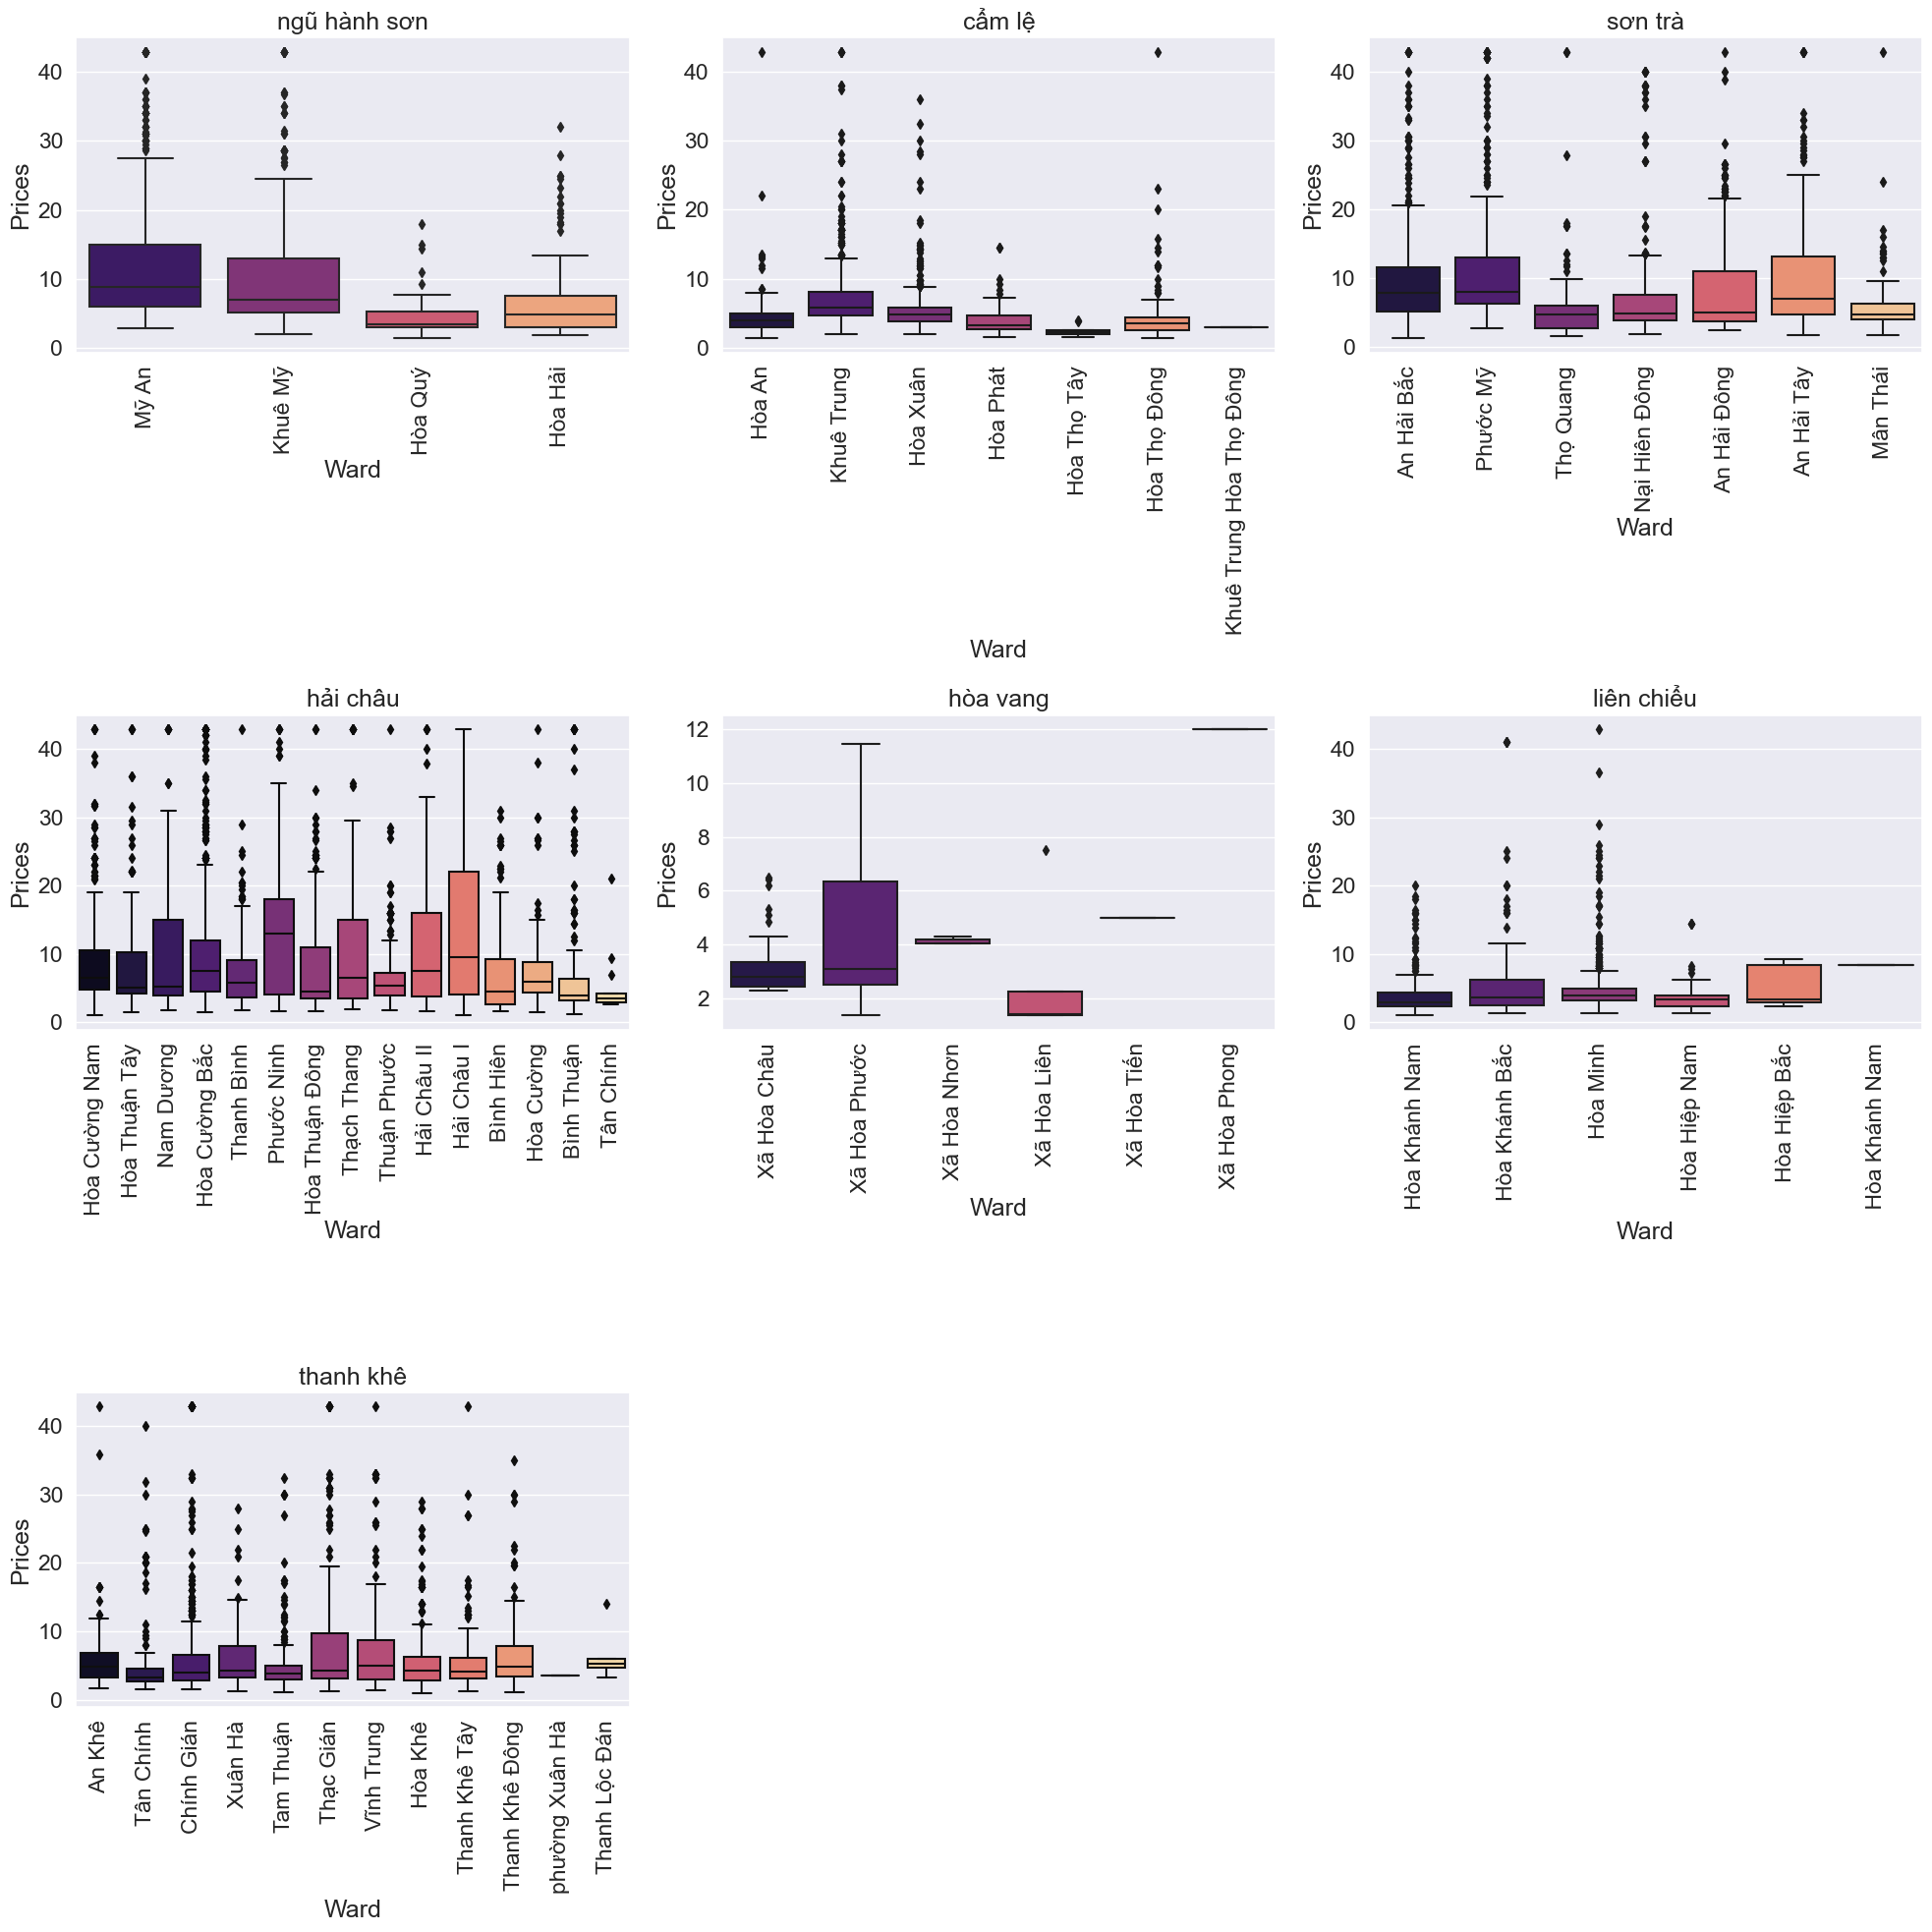

In [65]:

count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    #plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    sns.boxplot(x=PricesByWard['Ward'], y=PricesByWard['Prices'], palette=("magma"))
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()


Nhận xét:
- Tuy nhà ở các quận giống nhau nhưng khác phường thì lại có giá nhà khác nhau

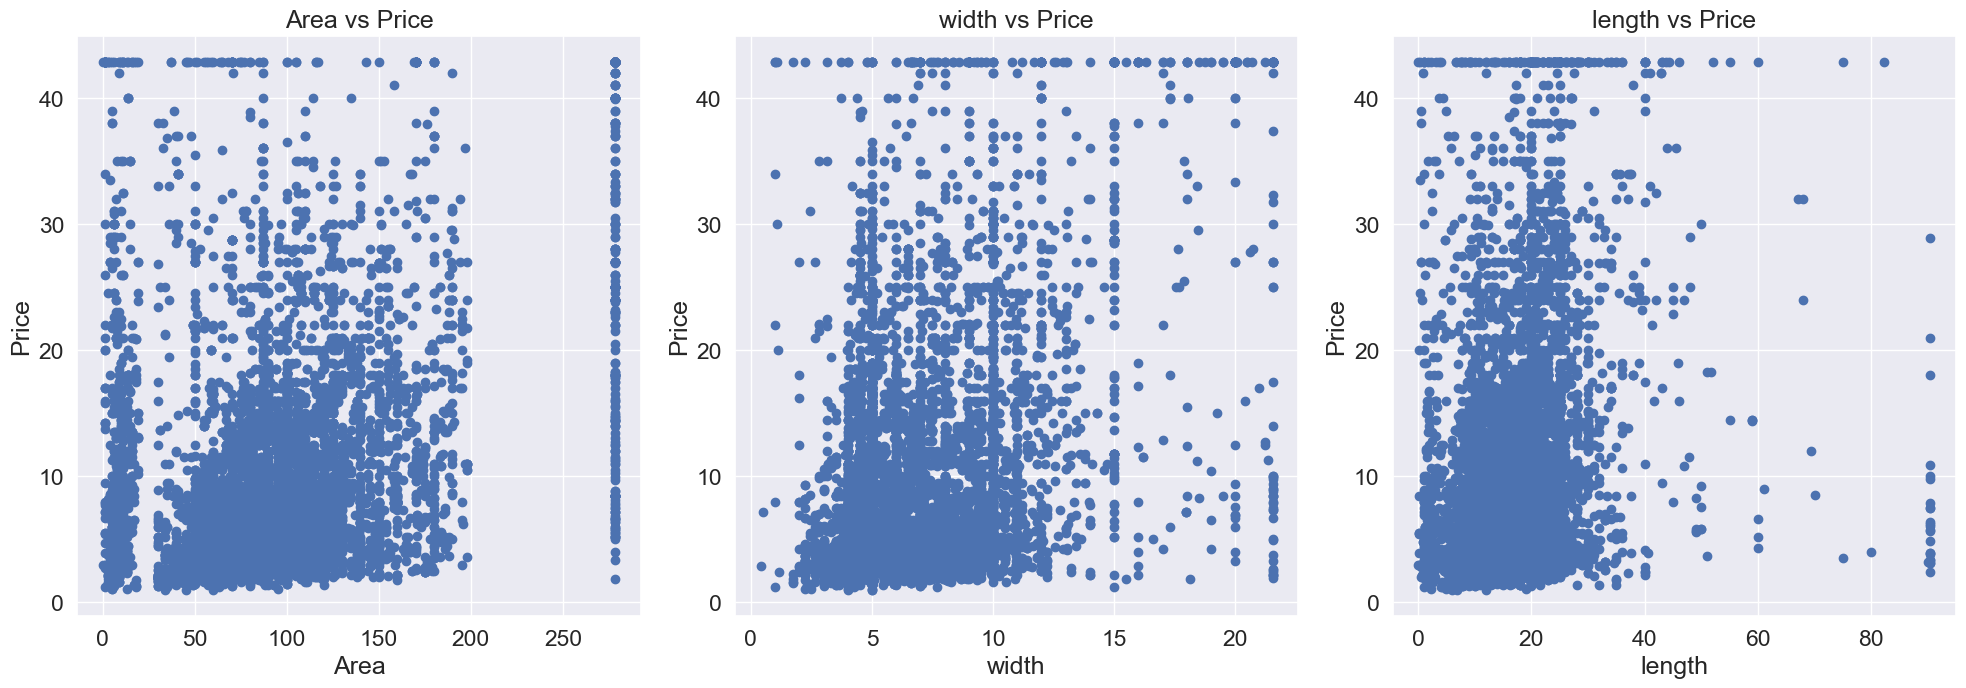

In [66]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['Prices'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area', 1)
scatter('width', 2)
scatter('length', 3)

plt.tight_layout()

Nhận xét:
- Diện tích nhà tập trung nhiều nhất là từ (40m2 -> 150m2)
- Chiều rộng ngôi nhà phân bố nhiều nhất là từ (5m -> 13m)
- Chiều dài ngôi nhà phân bố nhiều nhất là từ (4m -> 25m)

<Axes: >

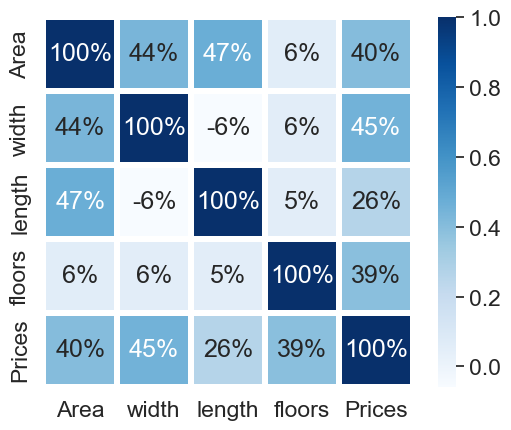

In [67]:
cols_pv = ['Area','width','length','floors','Prices']
sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

Từ biểu đồ ta thấy rằng các biến như floors, length, width, Area tương quan tốt với biến Prices

<h2>Kết Luận</h2>

Các biến ảnh hưởng đến Prices:

- Are
- length
- width
- District
- certificate
- floors


## Lable Encoding

In [68]:
df['District'].unique()

array(['ngũ hành sơn', 'cẩm lệ', 'sơn trà', 'hải châu', 'hòa vang',
       'liên chiểu', 'thanh khê'], dtype=object)

Chuyển dữ liệu trường District về dạnh số

- cẩm lệ -> 0
- hải châu -> 1
- thanh khê -> 2
- ngũ hành sơn -> 3
- sơn trà -> 4
- liên chiểu -> 5
- hòa vang -> 6

In [69]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

df['District'] = le.fit_transform(df['District'])


In [70]:
type_map = {'Nhà trong hẻm':0,'Nhà mặt tiền':1}
df['type']=le.fit_transform(df['type'].map(type_map))

In [71]:
df['certificate']= le.fit_transform(df['certificate'])

In [72]:
df.head(5)

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,An Thượng 18,Mỹ An,4,4.1,60.0,Không,1,0,4.5,15.0,5.0,"16.04836,108.24055",16.048361,108.240547,2.052976,2.521452
1,Trường Chinh,Hòa An,0,3.3,90.0,Không,1,0,5.0,18.0,2.0,"16.00735,108.19196",16.007351,108.191963,7.047915,9.089636
2,Ngô Quyền,An Hải Bắc,5,15.0,153.0,Không,1,0,6.0,27.0,3.0,"16.09631,108.24529",16.096310,108.245293,4.377946,2.882314
3,Tiên Sơn 10,Hòa Cường Nam,2,6.5,90.0,Không,1,0,14.0,7.0,1.0,"16.03438,108.22172",16.034380,108.221718,3.030561,4.778120
4,Hoàng Đức Lương,An Hải Bắc,5,11.0,100.0,Không,1,0,5.0,20.0,5.0,"16.07525,108.23292",16.075251,108.232918,1.695609,1.508238


# Chia Train/Test

In [73]:
from sklearn.model_selection import train_test_split
cols = ['Prices','District','Area','certificate','type','width','length','floors','DistanceToCenter','DistanceToBeach']
house = df[cols]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=123)

print(df_train.shape)
print(df_test.shape)

(10932, 10)
(2734, 10)


### Tách đặc trưng

In [74]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))


X_train: (10932, 10)
X_test: (2734, 10)


In [75]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (10932,)
y_test: (2734,)


In [76]:
X_train.head()

,District,Area,certificate,type,width,length,floors,DistanceToCenter,DistanceToBeach
13082,2,45.0,0,0,4.000000,11.200000,2.0,2.648596,4.132429
5834,5,90.0,0,1,5.000000,18.000000,2.0,3.458818,2.362293
10153,2,9.0,1,1,3.000000,3.000000,1.0,2.933684,4.986168
9248,2,80.0,1,1,8.944272,8.944272,3.0,1.237416,3.533295
2831,6,34.0,0,0,5.000000,6.800000,2.0,4.216852,6.404575


In [77]:
X_test.head()

,District,Area,certificate,type,width,length,floors,DistanceToCenter,DistanceToBeach
4880,6,120.0,0,1,10.954451,10.954451,2.0,1.412075,3.655989
563,6,41.0,0,0,4.000000,10.250000,3.0,1.382388,3.470395
7429,5,56.0,1,0,7.483315,7.483315,1.0,1.924596,1.450082
4204,0,91.0,0,1,3.300000,27.800000,3.0,5.253919,7.224641
12521,5,76.0,0,1,4.000000,18.000000,2.0,3.212940,2.553860


## Feature Transformation

In [78]:
data=df_train.copy()

In [79]:
import scipy.stats as stat
def plot_data(feature):
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    stat.probplot(data[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,2)
    stat.probplot(X_train[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,3)
    sns.histplot(data[feature])

    plt.subplot(2,2,4)
    sns.histplot(X_train[feature])
    
    plt.show()

Chuẩn hóa các trường với StandardScaler

In [80]:
from sklearn.preprocessing import StandardScaler,Normalizer,PowerTransformer
scaler = Normalizer()
X_train =  pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

Trước khi chuẩn hóa

<Figure size 1500x2000 with 0 Axes>

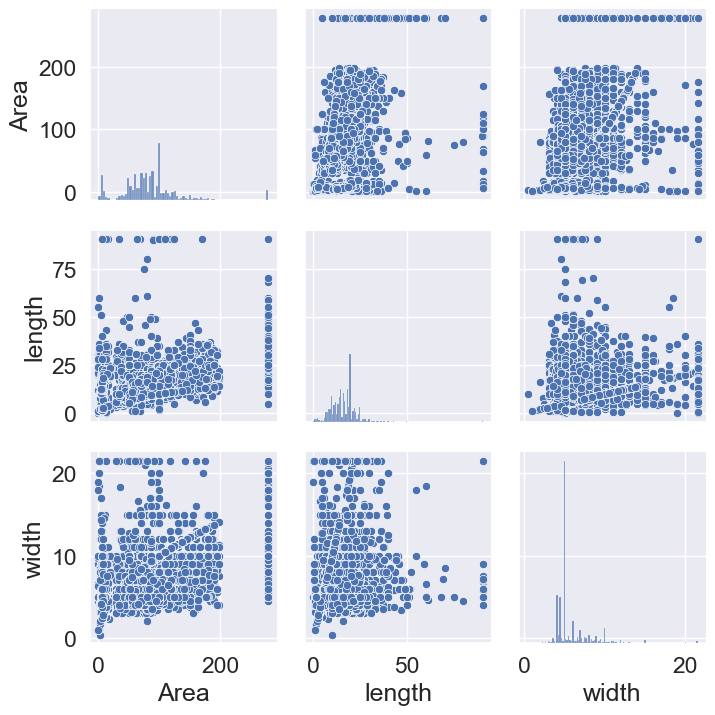

In [81]:
plt.figure(figsize=(15,20))
sns.pairplot(data[['Area','length','width']])
plt.tight_layout()

Sau khi chuẩn hóa

<Figure size 1500x2000 with 0 Axes>

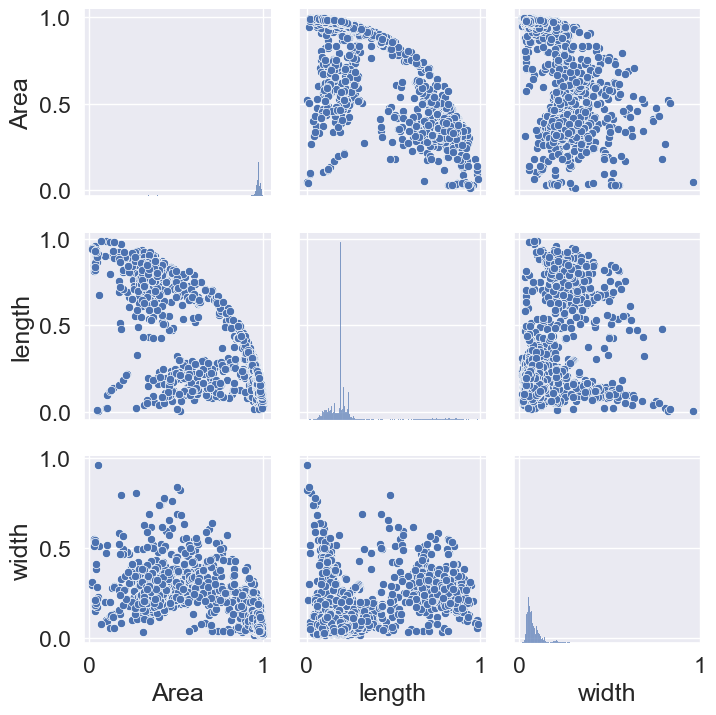

In [82]:
plt.figure(figsize=(15,20))
sns.pairplot(X_train[['Area','length','width']])
plt.tight_layout()

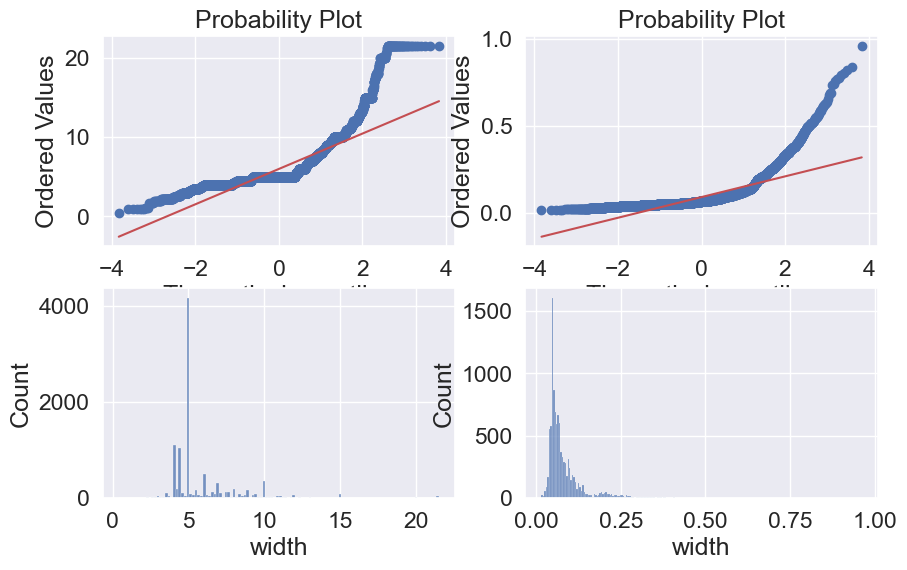

In [83]:
plot_data('width')

In [84]:
df_train.head()

,Prices,District,Area,certificate,type,width,length,floors,DistanceToCenter,DistanceToBeach
13082,2.95,2,45.0,0,0,4.000000,11.200000,2.0,2.648596,4.132429
5834,3.90,5,90.0,0,1,5.000000,18.000000,2.0,3.458818,2.362293
10153,8.90,2,9.0,1,1,3.000000,3.000000,1.0,2.933684,4.986168
9248,16.00,2,80.0,1,1,8.944272,8.944272,3.0,1.237416,3.533295
2831,1.00,6,34.0,0,0,5.000000,6.800000,2.0,4.216852,6.404575


In [85]:
df_test.head()

,Prices,District,Area,certificate,type,width,length,floors,DistanceToCenter,DistanceToBeach
4880,8.20,6,120.0,0,1,10.954451,10.954451,2.0,1.412075,3.655989
563,2.95,6,41.0,0,0,4.000000,10.250000,3.0,1.382388,3.470395
7429,14.50,5,56.0,1,0,7.483315,7.483315,1.0,1.924596,1.450082
4204,3.19,0,91.0,0,1,3.300000,27.800000,3.0,5.253919,7.224641
12521,4.50,5,76.0,0,1,4.000000,18.000000,2.0,3.212940,2.553860


# Linear Regression (Trinh)

In [86]:
from sklearn.linear_model import LinearRegression
# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred_LR  = model_LR.predict(X_test)

In [88]:
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
r2_score_LR = r2_score(y_test,y_pred_LR)
rmse_score_LR = np.sqrt(mean_squared_error(y_test,y_pred_LR))
mae_score_LR = mean_absolute_error(y_test,y_pred_LR)
print("r2_score: ",r2_score_LR)
print("rmse_score: ",rmse_score_LR)
print("mae_score: ",mae_score_LR)

r2_score:  0.21203050848112193
rmse_score:  6.663245354470619
mae_score:  4.320418364088964


In [89]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": y_pred_LR[:10]
}

df_predict = pd.DataFrame(rs)
print(df_predict)

       Price_Test  Price_Predict
4880         8.20      11.058435
563          2.95       4.001014
7429        14.50       8.723754
4204         3.19       6.319430
12521        4.50       8.002630
10678        8.30       9.071753
1976         2.70       5.544676
2513         5.75       5.622653
10509        1.92       5.297171
5567         5.25       7.834774


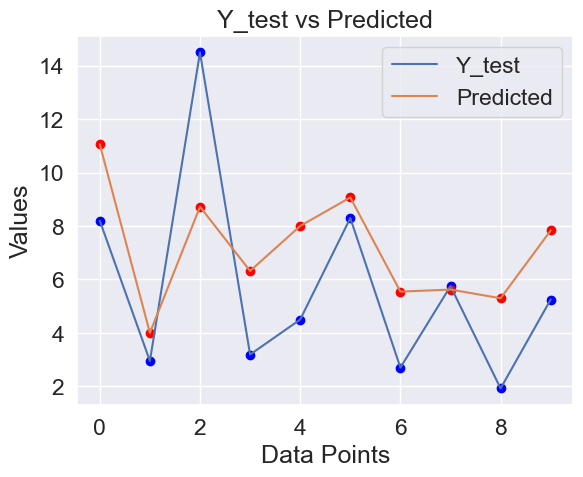

In [90]:
y_actual = y_test[:10]
y_predicted = y_pred_LR[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()

In [91]:
from sklearn.model_selection import cross_val_score
model =LinearRegression()


r2_scores_LR = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
rmse_scores_LR = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_LR = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [92]:
for i, score in enumerate(r2_scores_LR):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_LR))

Fold 1: 0.2614321761585311
Fold 2: 0.2349437329836751
Fold 3: 0.20425816168712985
Fold 4: 0.19830377752290096
Fold 5: 0.2431384416934126
R2 Score: 0.22841525800912993


In [93]:
for i, score in enumerate(rmse_scores_LR):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_LR)))

Fold 1: 6.457435255878827
Fold 2: 6.378393560638841
Fold 3: 6.468481851285565
Fold 4: 6.5960297333983995
Fold 5: 6.74909454735809
RMSE Score: 6.529886989711945


In [94]:
for i, score in enumerate(mae_scores_LR):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_LR))

Fold 1: 4.137625180784499
Fold 2: 4.1180829481161645
Fold 3: 4.176914707847699
Fold 4: 4.222817198636633
Fold 5: 4.3140506002396055
MAE Score: 4.19389812712492


### Tìm siêu tham số cho mô hình linear regression
Các siêu tham số quan trọng nhất trong mô hình Linear Regression bao gồm:

- Intercept (fit_intercept): Siêu tham số này quyết định liệu mô hình có sử dụng điểm cắt với trục y hay không. Nếu fit_intercept=True, mô hình sẽ có một điểm cắt với trục y. Nếu fit_intercept=False, mô hình sẽ đi qua gốc tọa độ (0,0). Mặc định, fit_intercept=True.

- Tham số copy_X quyết định liệu có sao chép (copy) các dữ liệu đầu vào (X) hay không. Nếu copy_X=True, dữ liệu đầu vào sẽ được sao chép trước khi huấn luyện mô hình để đảm bảo rằng dữ liệu gốc không bị thay đổi. Nếu copy_X=False, dữ liệu đầu vào sẽ được sử dụng trực tiếp. Mặc định, copy_X=True.

- Tham số positive quyết định liệu các hệ số trong mô hình Linear Regression có bị giới hạn là các giá trị dương hay không. Nếu positive=True, các hệ số sẽ bị giới hạn là các giá trị dương. Tham số này thường được sử dụng trong các bài toán mà các biến độc lập phải có ảnh hưởng dương đối với biến phụ thuộc. Mặc định, positive=False.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Khởi tạo mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Thiết lập các giá trị tham số để thử nghiệm
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False],
              'n_jobs':[1,2,3]}

# Sử dụng Grid Search để tìm kiếm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best score: 0.22841525800912993


Nhận xét:
Các siêu tham số mới tìm được bằng giá trị default 

# Random Forest Regressor (QKhang)

In [96]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [97]:
y_pred_RD = model_RD.predict(X_test)

In [98]:
r2_score_RD = r2_score(y_test,y_pred_RD)
rmse_score_RD = np.sqrt(mean_squared_error(y_test,y_pred_RD))
mae_score_RD = mean_absolute_error(y_test,y_pred_RD)
print("r2_score: ",r2_score_RD)
print("rmse_score: ",rmse_score_RD)
print("mae_score: ",mae_score_RD)

r2_score:  0.7642663956675266
rmse_score:  3.6445327067368605
mae_score:  1.735699405488388


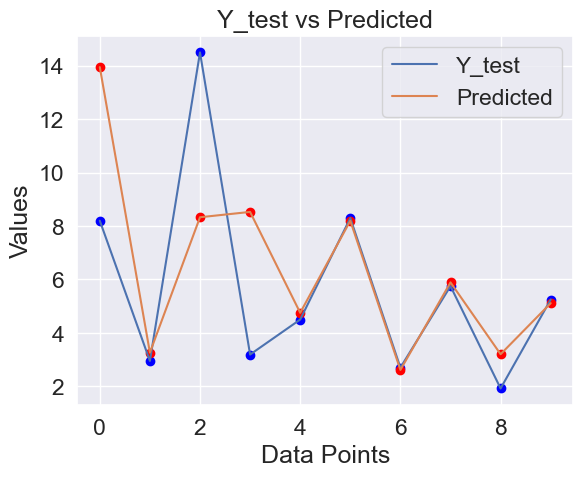

In [99]:
y_actual = y_test[:10]
y_predicted = y_pred_RD[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =RandomForestRegressor(random_state=123)
scorer = make_scorer(r2_score)

r2_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [101]:
for i, score in enumerate(r2_scores_RD):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_RD))

Fold 1: 0.7334898006111443
Fold 2: 0.7554449151639705
Fold 3: 0.7224756918608053
Fold 4: 0.733379342133226
Fold 5: 0.7051731737347059
R2 Score: 0.7299925847007704


In [102]:
for i, score in enumerate(rmse_scores_RD):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_RD)))

Fold 1: 3.879017919712057
Fold 2: 3.606226269805017
Fold 3: 3.820030072741352
Fold 4: 3.803860520453361
Fold 5: 4.212314481007645
RMSE Score: 3.864289852743886


In [103]:
for i, score in enumerate(mae_scores_RD):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_RD))

Fold 1: 1.9039441635985128
Fold 2: 1.8043771707917025
Fold 3: 1.8170800545039583
Fold 4: 1.8197783864659787
Fold 5: 1.9766599215897416
MAE Score: 1.8643679393899788


### Tìm siêu tham số cho mô hình

Các siêu tham số của mô hình

- n_estimators: Số lượng cây quyết định
- max_depth: Độ sâu tối đa của các cây quyết định
- min_samples_split: Số lượng mẫu tối thiểu yêu cầu để phân chia một nút.
- min_samples_leaf: Số lượng mẫu tối thiểu yêu cầu để tạo ra một lá
- max_features: Số lượng đặc trưng tối đa được xem xét để tìm kiếm phân chia tốt nhất (sqrt, log2)


In [104]:


# param_grid = {
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],  # độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 4],  # số lượng mẫu tối thiểu trong lá
}


In [105]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid)
# # Fit the grid search to the data
# grid_fit = grid_search.fit(X_train, y_train)
# best_parameters = grid_fit.best_params_
# best_parameters


In [106]:
model_RD1 = RandomForestRegressor(random_state=123,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
model_RD1.fit(X_train, y_train)
y_pred_RD_stt = model_RD1.predict(X_test)

In [107]:
r2_score_RD = r2_score(y_test,y_pred_RD_stt)
rmse_score_RD = np.sqrt(mean_squared_error(y_test,y_pred_RD_stt))
mae_score_RD = mean_absolute_error(y_test,y_pred_RD_stt)
print("r2_score: ",r2_score_RD)
print("rmse_score: ",rmse_score_RD)
print("mae_score: ",mae_score_RD)

r2_score:  0.7660336995037189
rmse_score:  3.6308454044595337
mae_score:  1.732743272415474


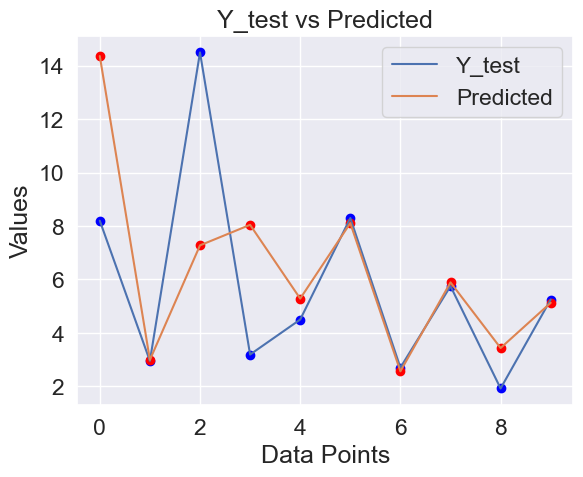

In [108]:
y_actual = y_test[:10]
y_predicted = y_pred_RD_stt[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =RandomForestRegressor(random_state=123,max_depth=50,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
scorer = make_scorer(r2_score)

r2_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [110]:
for i, score in enumerate(r2_scores_RD):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_RD))

Fold 1: 0.7300369955477518
Fold 2: 0.7593542788513638
Fold 3: 0.7309226412925203
Fold 4: 0.7436767142430007
Fold 5: 0.7053345997181559
R2 Score: 0.7338650459305585


In [111]:
for i, score in enumerate(rmse_scores_RD):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_RD)))

Fold 1: 3.9040645994374756
Fold 2: 3.577286273693585
Fold 3: 3.7614461223122055
Fold 4: 3.7296812464462965
Fold 5: 4.211161142760854
RMSE Score: 3.836727876930083


In [112]:
for i, score in enumerate(mae_scores_RD):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_RD))

Fold 1: 1.9633192957614995
Fold 2: 1.8023088966485605
Fold 3: 1.8251844785480436
Fold 4: 1.8099984202845183
Fold 5: 2.014789619709615
MAE Score: 1.8831201421904473


# Decision Tree Regression (Đức)

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X_train, y_train: Tập dữ liệu huấn luyện
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred_DT = model.predict(X_test)


In [114]:
r2_score_DT = r2_score(y_test,y_pred_DT)
rmse_score_DT = np.sqrt(mean_squared_error(y_test,y_pred_DT))
mae_score_DT = mean_absolute_error(y_test,y_pred_DT)
print("r2_score: ",r2_score_DT)
print("rmse_score: ",rmse_score_DT)
print("mae_score: ",mae_score_DT)

r2_score:  0.5458174832028084
rmse_score:  5.0587860237512
mae_score:  2.1217619549494104


In [115]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": y_pred_DT[:10]
}

data = pd.DataFrame(rs)
print(data)

       Price_Test  Price_Predict
4880         8.20         20.000
563          2.95          2.570
7429        14.50         14.000
4204         3.19         13.000
12521        4.50          6.250
10678        8.30          8.300
1976         2.70          2.590
2513         5.75          5.900
10509        1.92          1.500
5567         5.25          5.125


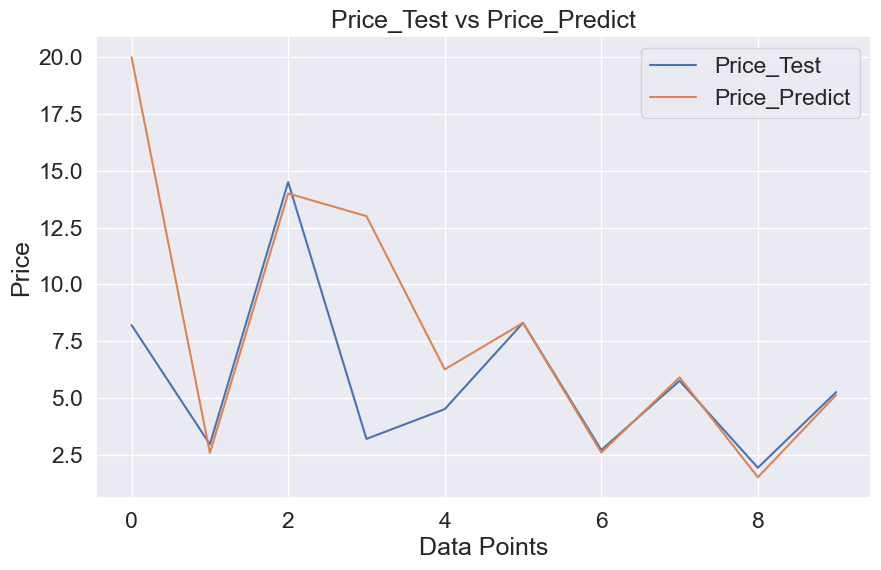

In [116]:
import matplotlib.pyplot as plt

# Trích xuất cột dữ liệu "Price_Test" và "Price_Predict"
price_test = data["Price_Test"]
price_predict = data["Price_Predict"]

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(len(price_test)), price_test, label="Price_Test")
plt.plot(range(len(price_predict)), price_predict, label="Price_Predict")
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title("Price_Test vs Price_Predict")
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =DecisionTreeRegressor()
scorer = make_scorer(r2_score)

r2_scores_DT = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_DT = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_DT = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [118]:
for i, score in enumerate(r2_scores_DT):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_DT))

Fold 1: 0.5178637126949575
Fold 2: 0.5081263848146849
Fold 3: 0.46875104302462145
Fold 4: 0.5446959439930897
Fold 5: 0.5247591911226634
R2 Score: 0.5128392551300034


In [119]:
for i, score in enumerate(rmse_scores_DT):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_DT)))

Fold 1: 5.178242251896669
Fold 2: 5.113149729997201
Fold 3: 5.102158466149502
Fold 4: 5.161930762277306
Fold 5: 5.486011465742229
RMSE Score: 5.208298535212582


In [120]:
for i, score in enumerate(mae_scores_DT):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_DT))

Fold 1: 2.3854760075721746
Fold 2: 2.220008851061977
Fold 3: 2.1991989159242835
Fold 4: 2.1415182410683973
Fold 5: 2.3457351867124463
MAE Score: 2.2583874404678554


### Tìm siêu tham số tối ưu

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo mô hình Decision Tree Regression
model = DecisionTreeRegressor()

# Thiết lập các giá trị để tìm kiếm
param_grid = {
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Áp dụng Grid Search với các siêu tham số và cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.6026740871046768
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [122]:
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo mô hình Decision Tree Regression với siêu tham số tốt nhất
model = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=4)

# Huấn luyện mô hình với dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred_DT_stt = model.predict(X_test)

In [123]:
r2_score_DT_stt = r2_score(y_test,y_pred_DT_stt)
rmse_score_DT_stt = np.sqrt(mean_squared_error(y_test,y_pred_DT_stt))
mae_score_DT_stt = mean_absolute_error(y_test,y_pred_DT_stt)
print("r2_score: ",r2_score_DT_stt)
print("rmse_score: ",rmse_score_DT_stt)
print("mae_score: ",mae_score_DT_stt)

r2_score:  0.6554807191675482
rmse_score:  4.405932808132551
mae_score:  2.1496018897343196


In [124]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict1": y_pred_DT[:10],
  "Price_Predict": y_pred_DT_stt[:10]
}

df_DT = pd.DataFrame(rs)
print(df_DT)

       Price_Test  Price_Predict1  Price_Predict
4880         8.20          20.000      14.205000
563          2.95           2.570       2.815000
7429        14.50          14.000       2.261429
4204         3.19          13.000       8.796250
12521        4.50           6.250       6.435714
10678        8.30           8.300       8.098333
1976         2.70           2.590       2.608000
2513         5.75           5.900       5.875000
10509        1.92           1.500       2.370000
5567         5.25           5.125       5.786851


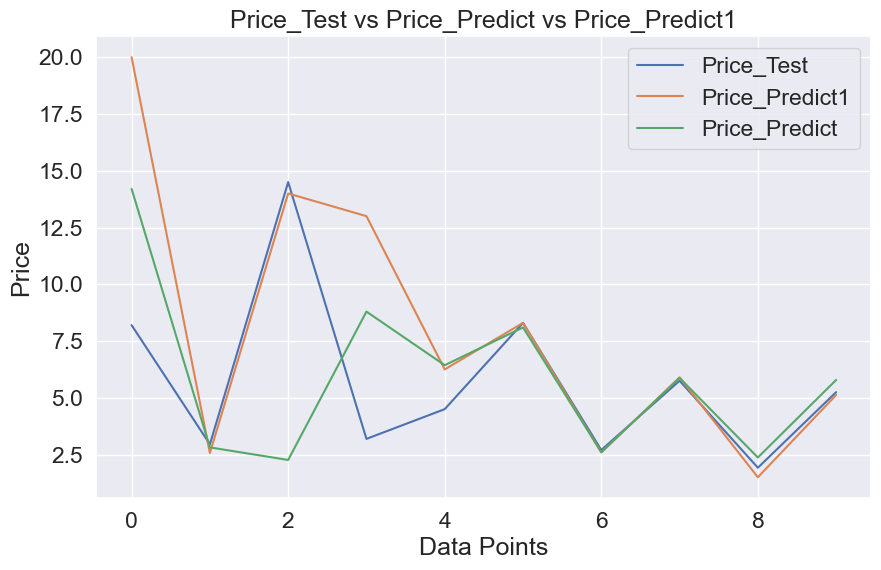

In [125]:
import matplotlib.pyplot as plt

# Trích xuất cột dữ liệu "Price_Test", "Price_Predict1" và "Price_Predict"
price_test = df_DT["Price_Test"]
price_predict1 = df_DT["Price_Predict1"]
price_predict = df_DT["Price_Predict"]

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(len(price_test)), price_test, label="Price_Test")
plt.plot(range(len(price_predict1)), price_predict1, label="Price_Predict1")
plt.plot(range(len(price_predict)), price_predict, label="Price_Predict")
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title("Price_Test vs Price_Predict vs Price_Predict1")
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=4)
scorer = make_scorer(r2_score)

r2_scores_DT_stt = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_DT_stt = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_DT_stt = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [127]:
for i, score in enumerate(r2_scores_DT_stt):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_DT_stt))

Fold 1: 0.6080913899794623
Fold 2: 0.5916739681143226
Fold 3: 0.6289111370457898
Fold 4: 0.5975825967658634
Fold 5: 0.5857872421425461
R2 Score: 0.6024092668095969


In [128]:
for i, score in enumerate(rmse_scores_DT_stt):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_DT_stt)))

Fold 1: 4.707052035868328
Fold 2: 4.6410175275139585
Fold 3: 4.428044562441691
Fold 4: 4.687966820403905
Fold 5: 5.001480179069096
RMSE Score: 4.693112225059396


In [129]:
for i, score in enumerate(mae_scores_DT_stt):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_DT_stt))

Fold 1: 2.3276513320616634
Fold 2: 2.2965229044269853
Fold 3: 2.1250933729848382
Fold 4: 2.2521731809487573
Fold 5: 2.354171489808492
MAE Score: 2.271122456046147


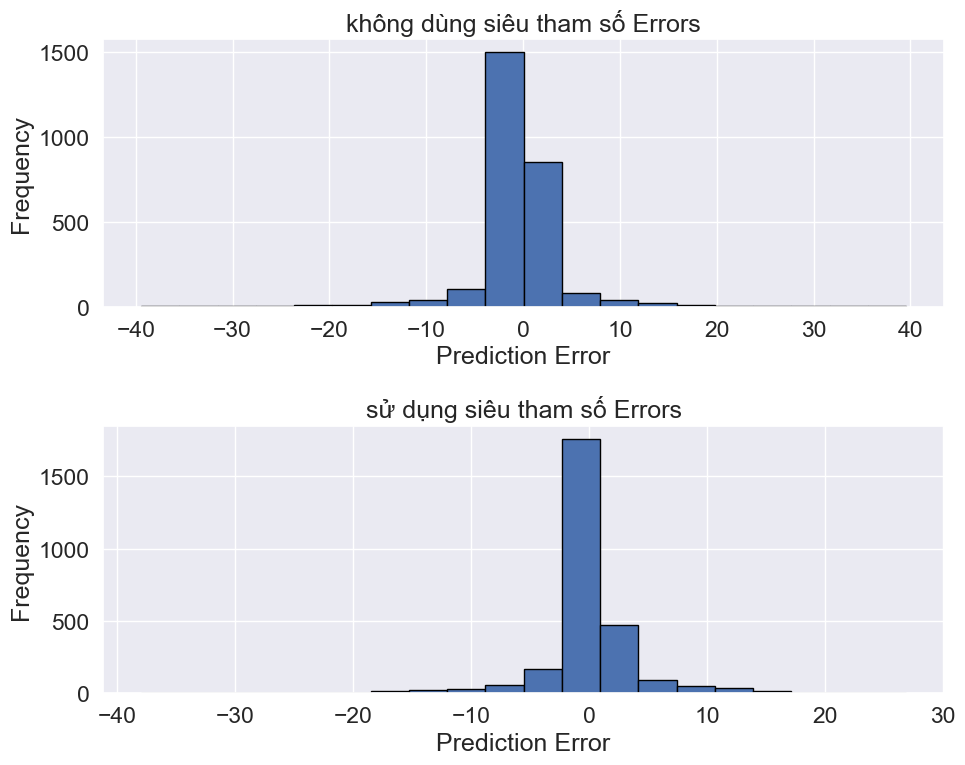

In [130]:
import matplotlib.pyplot as plt

# Tính toán sai số giữa dự đoán và dữ liệu thực tế
errors1 = y_pred_DT - y_test
errors2 = y_pred_DT_stt - y_test

# Tạo khung hình và các trục đồ thị
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Trực quan hóa dữ liệu và dự đoán của mô hình dưới dạng line plot
ax1.hist(errors1, bins=20, edgecolor='black')
ax1.set_xlabel('Prediction Error')
ax1.set_ylabel('Frequency')
ax1.set_title('không dùng siêu tham số Errors')

# Trực quan hóa sai số dưới dạng histogram
ax2.hist(errors2, bins=20, edgecolor='black')
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('sử dụng siêu tham số Errors')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

# Đánh giá 3 thuật theo các metrics

In [131]:
dict = {"linear":[r2_score_LR,rmse_score_LR,mae_score_LR],
        "random_forest":[r2_score_RD,rmse_score_RD,mae_score_RD],
        "decission":[r2_score_DT_stt,rmse_score_DT_stt,mae_score_DT_stt]}
df_scores = pd.DataFrame(dict,index=["R2","RMSE","MAE"])
df_scores

,linear,random_forest,decission
R2,0.212031,0.766034,0.655481
RMSE,6.663245,3.630845,4.405933
MAE,4.320418,1.732743,2.149602


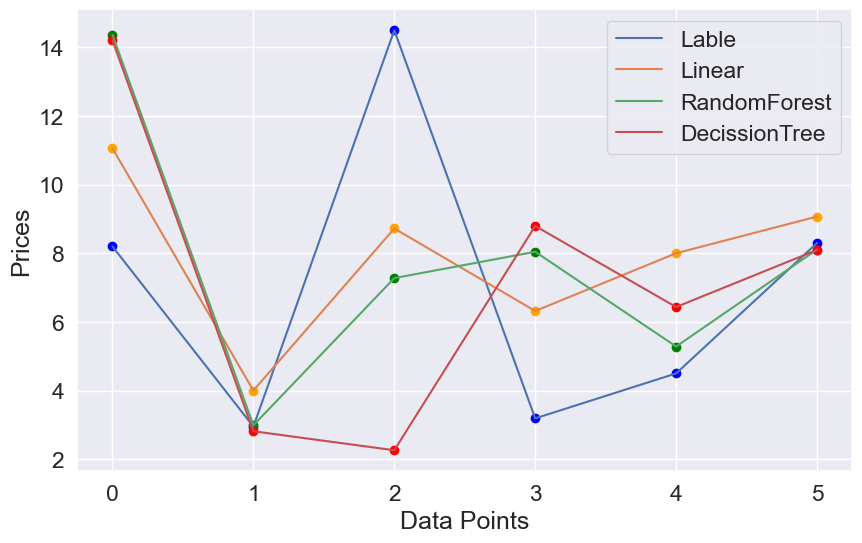

In [132]:
actual = y_test[:6]
linear = y_pred_LR[:6]
random = y_pred_RD_stt[:6]
decission = y_pred_DT_stt[:6]
index = range(6)
plt.figure(figsize=(10,6))
plt.plot(index,actual, label='Lable')
plt.scatter(index, actual, color='blue')

plt.plot(index,linear, label='Linear')
plt.scatter(range(len(linear)), linear, color='orange')

plt.plot(index,random, label='RandomForest')
plt.scatter(range(len(random)), random, color='green')

plt.plot(index,decission, label='DecissionTree')
plt.scatter(range(len(decission)), decission, color='red')

plt.xlabel('Data Points')
plt.ylabel('Prices')

plt.legend()

plt.show()

## So sánh R2 Score của 3 mô hình theo kỹ thuật cross validation

In [133]:
dict = {"linear":r2_scores_LR,"random_forest":r2_scores_RD,"decission":r2_score_DT_stt}
df_r2 = pd.DataFrame(dict)
df_r2

,linear,random_forest,decission
0,0.261432,0.730037,0.655481
1,0.234944,0.759354,0.655481
2,0.204258,0.730923,0.655481
3,0.198304,0.743677,0.655481
4,0.243138,0.705335,0.655481


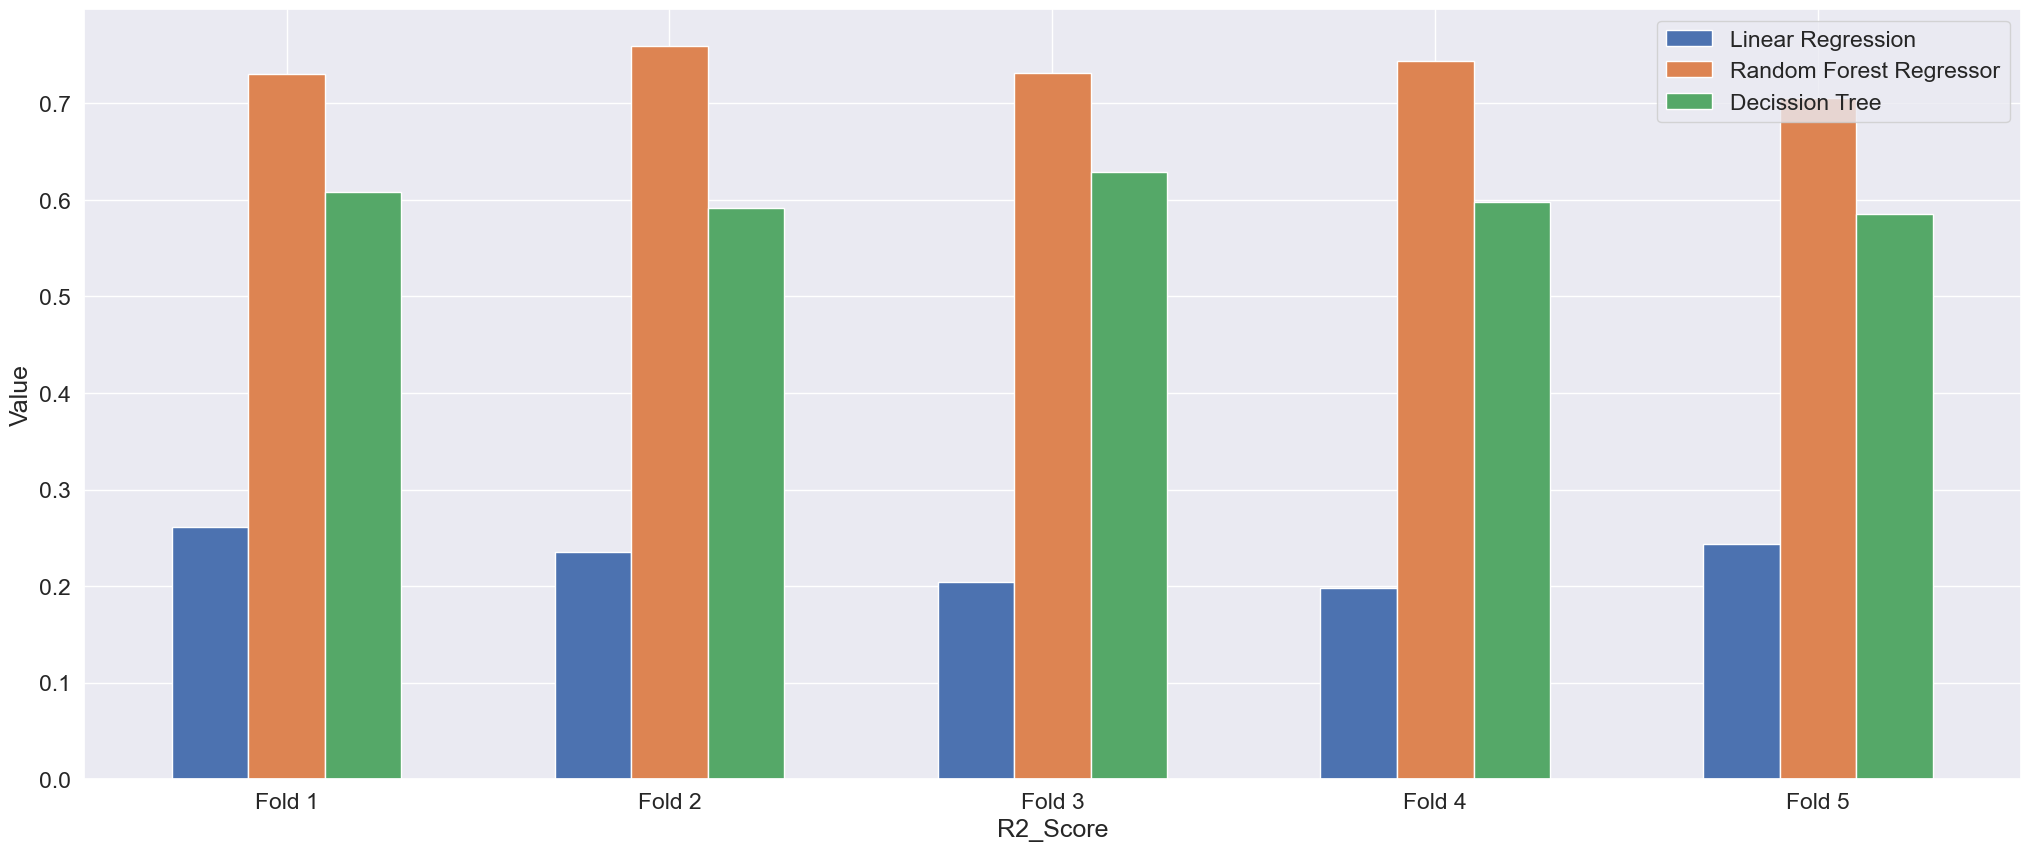

In [134]:
X = ['Fold 1','Fold 2','Fold 3', 'Fold 4','Fold 5']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, r2_scores_LR , 0.2, label = 'Linear Regression')
plt.bar(X_axis , r2_scores_RD, 0.2, label = 'Random Forest Regressor')
plt.bar(X_axis + 0.2, r2_scores_DT_stt, 0.2, label = 'Decission Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("R2_Score")
plt.ylabel("Value")
plt.legend()
plt.show()

<h4>Nhận xét: Mô hình Random Forest Regression luôn có tỷ lệ dự đoán cao hơn so với 2 mô hình còn lại</h4>

## So sánh RMSE của 3 mô hình theo kỹ thuật Cross validation

In [135]:
dict = {"linear":rmse_scores_LR,"random_forest":rmse_scores_RD,"decission":rmse_score_DT_stt}
df_rmse = pd.DataFrame(dict)
df_rmse

,linear,random_forest,decission
0,41.698470,15.241720,4.405933
1,40.683904,12.796977,4.405933
2,41.841257,14.148477,4.405933
3,43.507608,13.910522,4.405933
4,45.550277,17.733878,4.405933


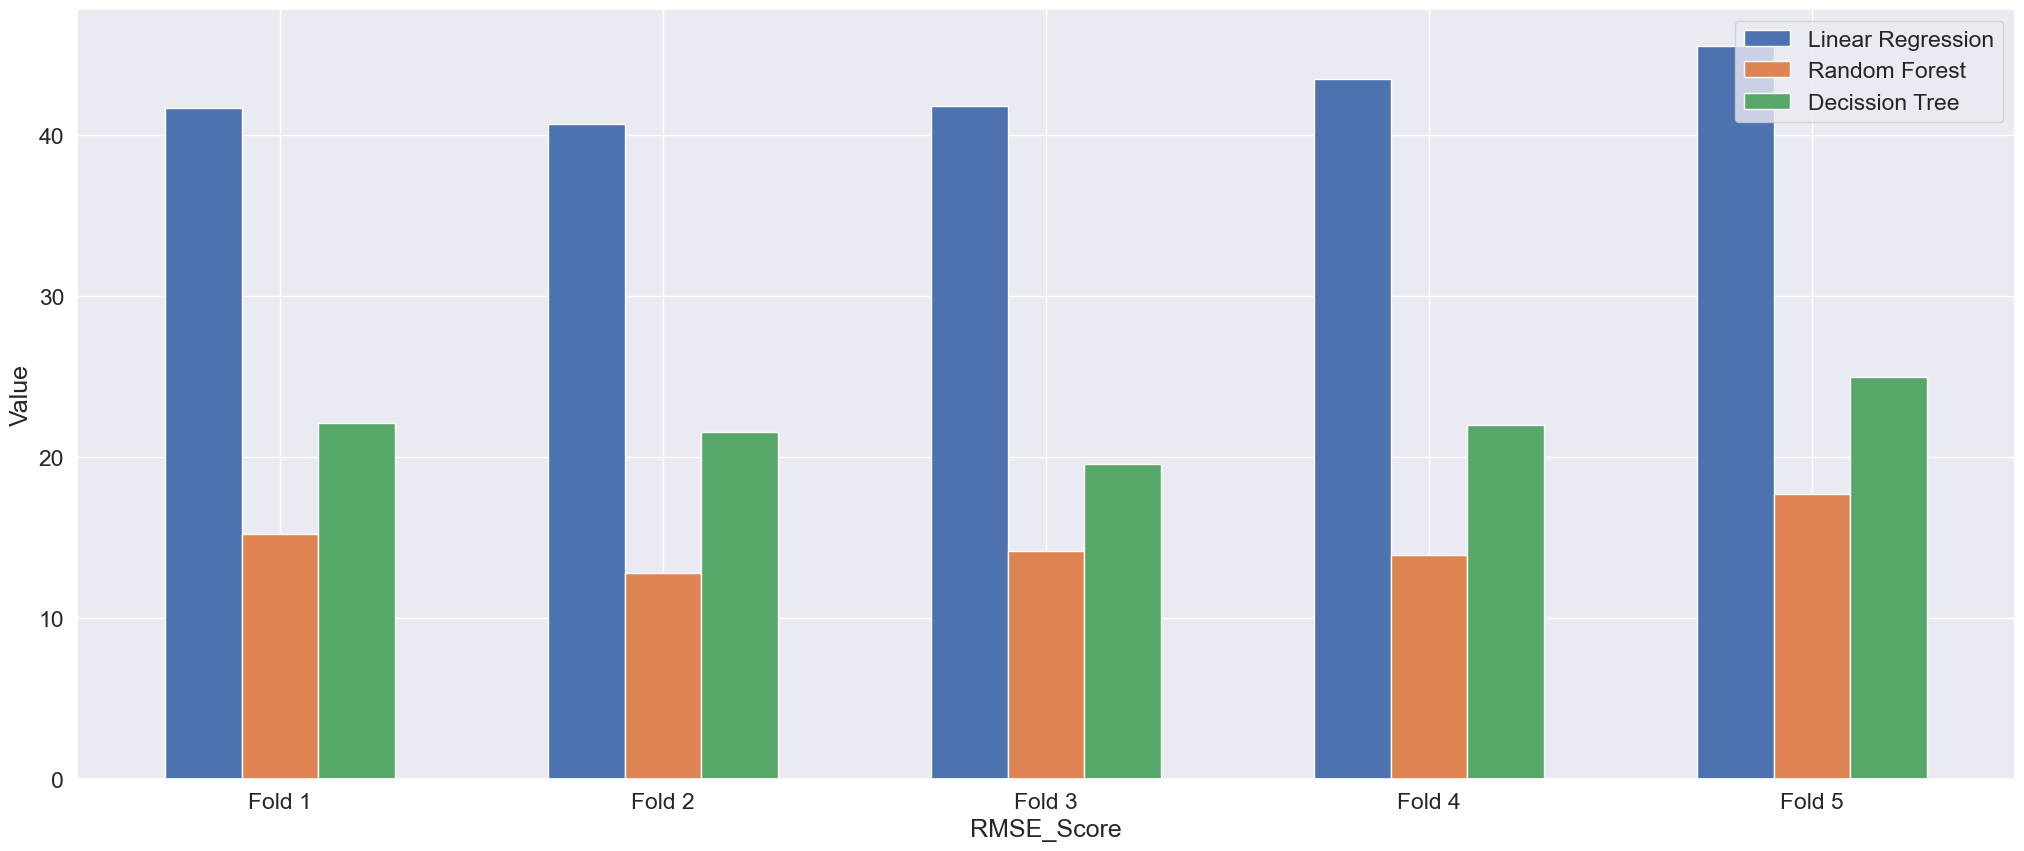

In [136]:
X = ['Fold 1','Fold 2','Fold 3', 'Fold 4','Fold 5']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, rmse_scores_LR , 0.2, label = 'Linear Regression')
plt.bar(X_axis , rmse_scores_RD, 0.2, label = 'Random Forest ')
plt.bar(X_axis + 0.2, rmse_scores_DT_stt, 0.2, label = 'Decission Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("RMSE_Score")
plt.ylabel("Value")
plt.legend()
plt.show()

## So sánh MAE của 3 mô hình theo kỹ thuật cross validation

In [137]:
dict = {"linear":mae_scores_LR,"random_forest":mae_scores_RD,"decission":mae_score_DT_stt}
df_mae = pd.DataFrame(dict)
df_mae

,linear,random_forest,decission
0,4.137625,1.963319,2.149602
1,4.118083,1.802309,2.149602
2,4.176915,1.825184,2.149602
3,4.222817,1.809998,2.149602
4,4.314051,2.014790,2.149602


<h4>Nhận xét: Mô hình Random Forest luôn cho RMSE thất hơn so với 2 mô hình</h4>

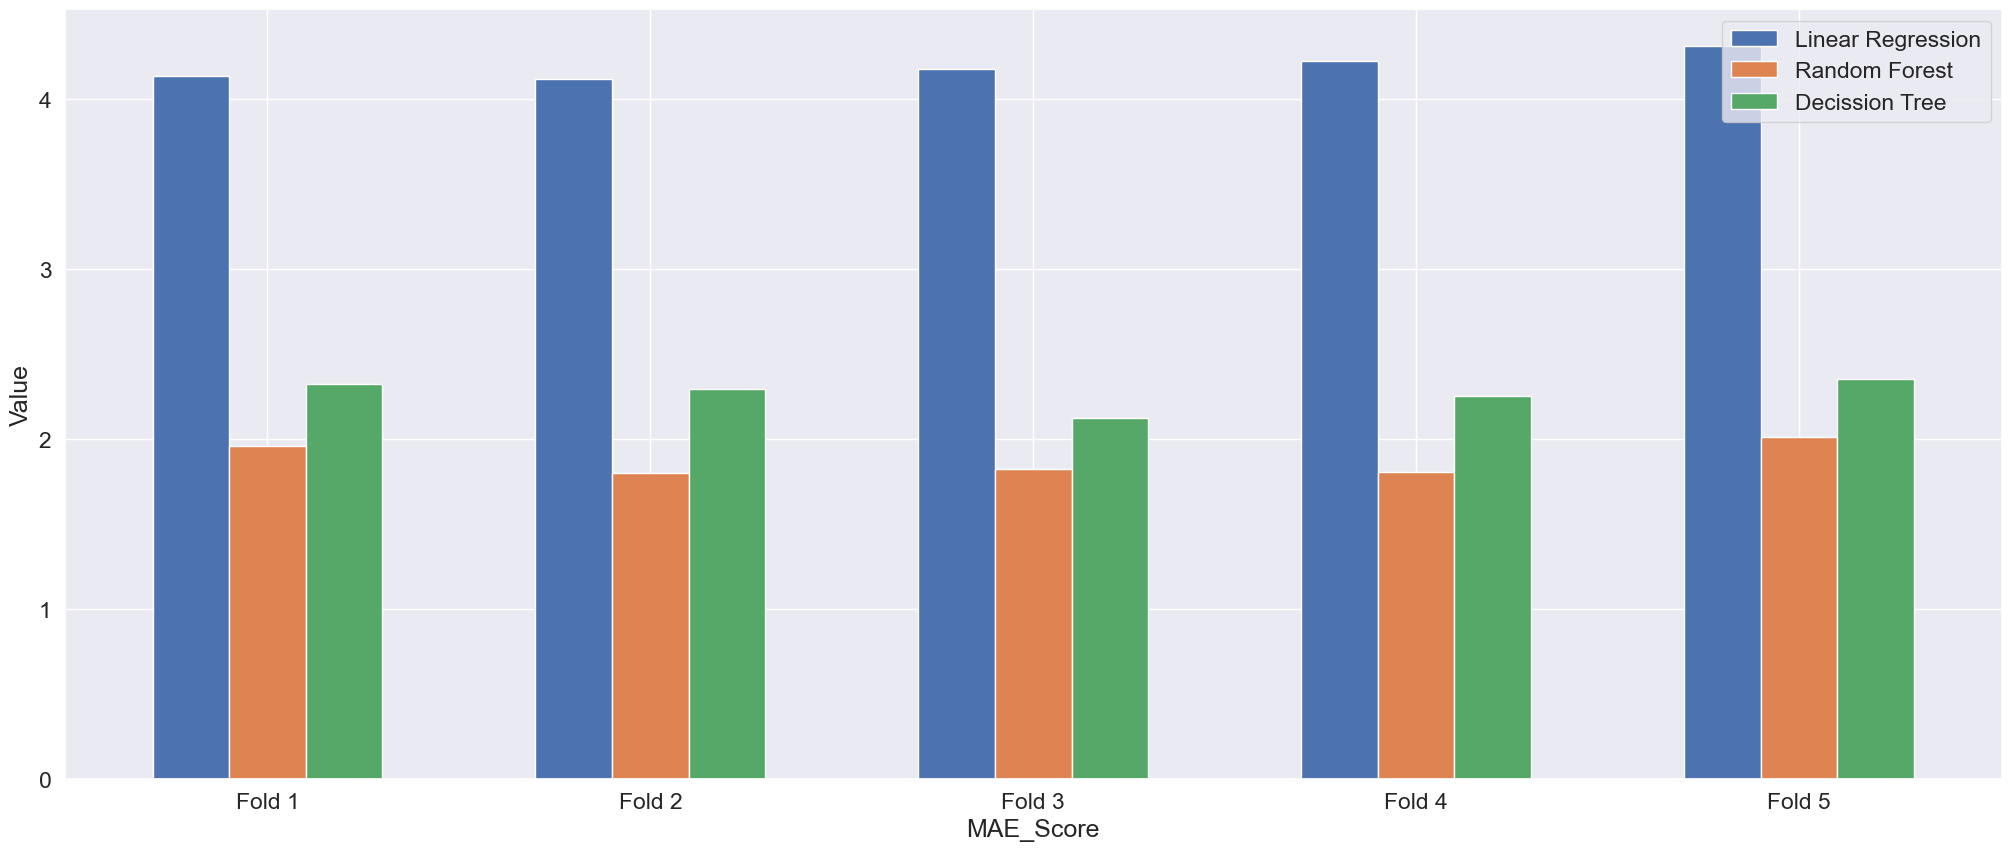

In [138]:
X = ['Fold 1','Fold 2','Fold 3', 'Fold 4','Fold 5']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, mae_scores_LR , 0.2, label = 'Linear Regression')
plt.bar(X_axis , mae_scores_RD, 0.2, label = 'Random Forest ')
plt.bar(X_axis + 0.2, mae_scores_DT_stt, 0.2, label = 'Decission Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("MAE_Score")
plt.ylabel("Value")
plt.legend()
plt.show()

## So sánh tương quan giữa Prices_test và Prices_pred của 3 mô hình

Tương quan giữa prices dự đoán theo mô hình linear regression va thực tế 

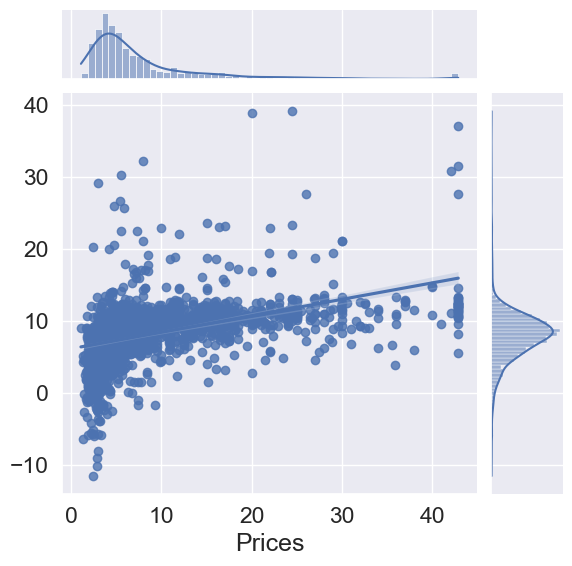

In [139]:
sns.jointplot(x=y_test,y=y_pred_LR,kind='reg')

Nhận xét:

- Mô hình Linear Regression một vài nơi cho Prices âm

Tương quan giữa prices dự đoán theo mô hình Random Forest regression va thực tế 

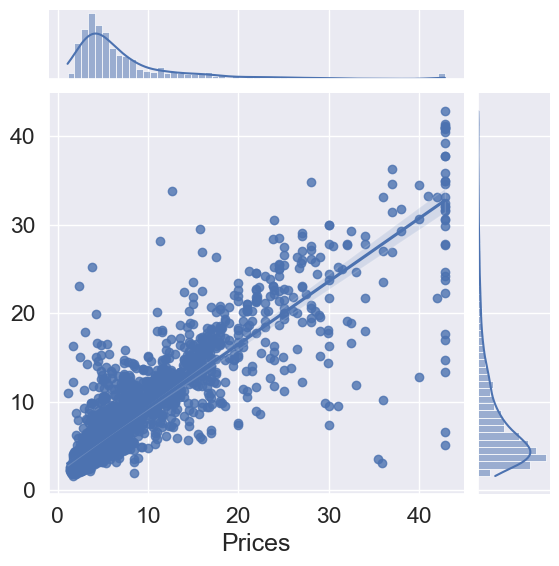

In [140]:
sns.jointplot(x=y_test,y=y_pred_RD_stt,kind='reg')

Tương quan giữa prices dự đoán theo mô hình Decission Tree regression va thực tế 

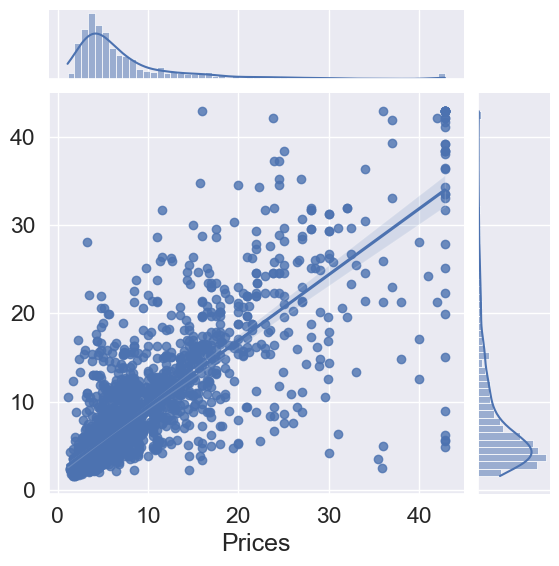

In [141]:
sns.jointplot(x=y_test,y=y_pred_DT_stt,kind='reg')

<h4>Nhận Xét: </h4>

- Tương quan đặc trưng giữa các biến Prices theo mô hình Linear Regression ít có sự hồi quy với nhau
- Tương quan đặc trưng giữa các biến Prices theo mô hình Random Forest Regression và Decission Tree Regression có sự hồi quy với nhau

<h3 style="color:yellow;">KẾT LUẬN</h3>

- Mô hình Random Forest Regression và Decission Tree Regression thích hợp để dự đoán giá nhà tại Đà Nẵng trong đó Random Forest là tối ưu nhất
- Mô hình Linear Regression là mô hình không thích hợp
